In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/SpeechAccentRecognition')

In [ ]:
!pip install torch torchaudio numpy pandas scikit-learn matplotlib seaborn

In [4]:
import pandas as pd

df = pd.read_parquet('speech_accent_archive_synth/original-00000-of-00011.parquet')
print(df.head())
print(df.columns)

                                               audio          id
0  {'bytes': b'RIFF\xd6\xf4\x1b\x00WAVEfmt \x10\x...  afrikaans1
1  {'bytes': b'RIFF\x90\x8e\x1d\x00WAVEfmt \x10\x...  afrikaans2
2  {'bytes': b'RIFF$-$\x00WAVEfmt \x10\x00\x00\x0...  afrikaans3
3  {'bytes': b'RIFF\xb2\x96\x1f\x00WAVEfmt \x10\x...  afrikaans4
4  {'bytes': b'RIFF\xbaA\x1b\x00WAVEfmt \x10\x00\...  afrikaans5
Index(['audio', 'id'], dtype='object')


In [5]:
!pip install torchcodec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.1 MB/s eta 0:00:00


In [6]:
import io
import torchaudio

# Select the first audio entry
sample_audio_entry = df['audio'].iloc[0]

# Access the bytes data and wrap it in an io.BytesIO object
wav_bytes = io.BytesIO(sample_audio_entry['bytes'])

# Load the audio waveform and its sampling rate
waveform, sample_rate = torchaudio.load(wav_bytes)

# Print the sampling rate
print(f"Sampling Rate: {sample_rate} Hz")

# Get the number of channels from the loaded waveform
num_channels = waveform.shape[0]
print(f"Number of Channels: {num_channels}")

# Calculate the duration of the audio in seconds
duration = waveform.shape[1] / sample_rate
print(f"Duration: {duration:.2f} seconds")

Sampling Rate: 44100 Hz
Number of Channels: 1
Duration: 20.77 seconds


## Summary:

The sampling rate of the audio file is 44100 Hz. Other relevant characteristics include 1 channel and a duration of approximately 20.77 seconds.


## Load All Parquet Files
Load all `original-0000X-of-XXX.parquet` files where X ranges from 0 to 10 within the `speech_accent_archive_synth` directory. Load them into a list of pandas DataFrames and then concatenate these into a single, comprehensive DataFrame `df`.


In [7]:
import pandas as pd
import os

# Define the directory path
directory_path = 'speech_accent_archive_synth'

# Create an empty list to store individual DataFrames
df_list = []

# Loop through numbers from 0 to 10
for i in range(11): # range(11) goes from 0 to 10
    # Construct the full file path for each parquet file with correct 5-digit padding
    file_name = f'original-{i:05d}-of-00011.parquet'
    full_file_path = os.path.join(directory_path, file_name)

    # Read each parquet file into a pandas DataFrame and append it to the list
    try:
        temp_df = pd.read_parquet(full_file_path)
        df_list.append(temp_df)
        print(f"Successfully loaded {full_file_path}")
    except FileNotFoundError:
        print(f"File not found: {full_file_path}. Skipping.")
    except Exception as e:
        print(f"Error loading {full_file_path}: {e}. Skipping.")

# Concatenate all DataFrames in the list into a single DataFrame named df
if df_list:
    df = pd.concat(df_list, ignore_index=True)
    print("\nAll parquet files concatenated into a single DataFrame 'df'.")
    # Display the first few rows of the combined DataFrame df
    print("\nFirst 5 rows of the combined DataFrame:")
    print(df.head())
    # Display its shape to verify successful loading
    print("\nShape of the combined DataFrame:", df.shape)
else:
    print("No parquet files were loaded.")

Successfully loaded speech_accent_archive_synth/original-00000-of-00011.parquet
Successfully loaded speech_accent_archive_synth/original-00001-of-00011.parquet
Successfully loaded speech_accent_archive_synth/original-00002-of-00011.parquet
Successfully loaded speech_accent_archive_synth/original-00003-of-00011.parquet
Successfully loaded speech_accent_archive_synth/original-00004-of-00011.parquet
Successfully loaded speech_accent_archive_synth/original-00005-of-00011.parquet
Successfully loaded speech_accent_archive_synth/original-00006-of-00011.parquet
Successfully loaded speech_accent_archive_synth/original-00007-of-00011.parquet
Successfully loaded speech_accent_archive_synth/original-00008-of-00011.parquet
Successfully loaded speech_accent_archive_synth/original-00009-of-00011.parquet
Successfully loaded speech_accent_archive_synth/original-00010-of-00011.parquet

All parquet files concatenated into a single DataFrame 'df'.

First 5 rows of the combined DataFrame:
                 

# Data preparation and data cleaning

## Extract Accent Labels from 'id' Column

In [8]:
import re

# Extract the accent labels by removing trailing digits from the 'id' column
df['accent'] = df['id'].apply(lambda x: re.sub(r'\d+$', '', x))

# Display the first few rows of the DataFrame to verify the new 'accent' column
print(df.head())

                                               audio          id     accent
0  {'bytes': b'RIFF\xd6\xf4\x1b\x00WAVEfmt \x10\x...  afrikaans1  afrikaans
1  {'bytes': b'RIFF\x90\x8e\x1d\x00WAVEfmt \x10\x...  afrikaans2  afrikaans
2  {'bytes': b'RIFF$-$\x00WAVEfmt \x10\x00\x00\x0...  afrikaans3  afrikaans
3  {'bytes': b'RIFF\xb2\x96\x1f\x00WAVEfmt \x10\x...  afrikaans4  afrikaans
4  {'bytes': b'RIFF\xbaA\x1b\x00WAVEfmt \x10\x00\...  afrikaans5  afrikaans


## Analyze and Visualize Accent Distribution


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the value counts of the 'accent' column
accent_counts = df['accent'].value_counts()

print("Distribution of Accent Labels:")
print(accent_counts)


Distribution of Accent Labels:
accent
english     579
spanish     162
arabic      102
mandarin     65
french       63
           ... 
xasonga       1
yapese        1
yakut         1
yupik         1
zulu          1
Name: count, Length: 200, dtype: int64


In [10]:
pip install wordcloud

## Generate Word Cloud Visualization

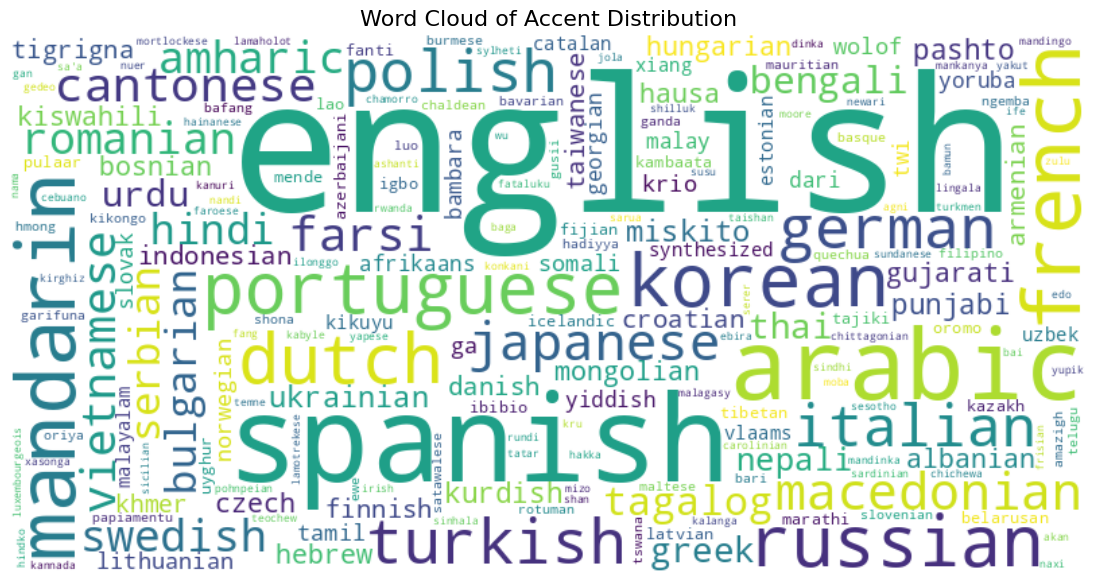

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(accent_counts)

# Display the generated image:
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Turn off axes
plt.title('Word Cloud of Accent Distribution', fontsize=16)
plt.show()

## Audio Durations

In [13]:
import io
import torchaudio
import pandas as pd

# 1. Define an empty list to store the calculated durations
audio_durations = []

# 2. Iterate through each entry in the 'audio' column of the df DataFrame
for index, audio_entry in df['audio'].items():
    try:
        # 3. Access the audio bytes and wrap them in an io.BytesIO object
        wav_bytes = io.BytesIO(audio_entry['bytes'])

        # 4. Use torchaudio.load() within a try-except block to load the waveform and sample rate
        waveform, sample_rate = torchaudio.load(wav_bytes)

        # 5. If loading is successful, calculate the duration
        duration = waveform.shape[1] / sample_rate
        audio_durations.append(duration)
    except Exception as e:
        # If an error occurs during loading, append None to audio_durations and continue
        print(f"Error loading audio at index {index}: {e}. Appending None.")
        audio_durations.append(None)

# 7. After the loop, add a new column named 'duration' to the df DataFrame
df['duration'] = audio_durations

# 8. Display the first few rows of the df DataFrame to verify the new 'duration' column
print(df.head())

                                               audio          id     accent  \
0  {'bytes': b'RIFF\xd6\xf4\x1b\x00WAVEfmt \x10\x...  afrikaans1  afrikaans   
1  {'bytes': b'RIFF\x90\x8e\x1d\x00WAVEfmt \x10\x...  afrikaans2  afrikaans   
2  {'bytes': b'RIFF$-$\x00WAVEfmt \x10\x00\x00\x0...  afrikaans3  afrikaans   
3  {'bytes': b'RIFF\xb2\x96\x1f\x00WAVEfmt \x10\x...  afrikaans4  afrikaans   
4  {'bytes': b'RIFF\xbaA\x1b\x00WAVEfmt \x10\x00\...  afrikaans5  afrikaans   

    duration  
0  20.772268  
1  21.961497  
2  26.880000  
3  23.471179  
4  20.252404  


## Audio Duration Distribution


Descriptive Statistics for Audio Durations:
count    2138.000000
mean       27.716418
std         8.046024
min        15.768277
25%        22.290799
50%        25.716270
75%        30.984161
max       106.536000
Name: duration, dtype: float64


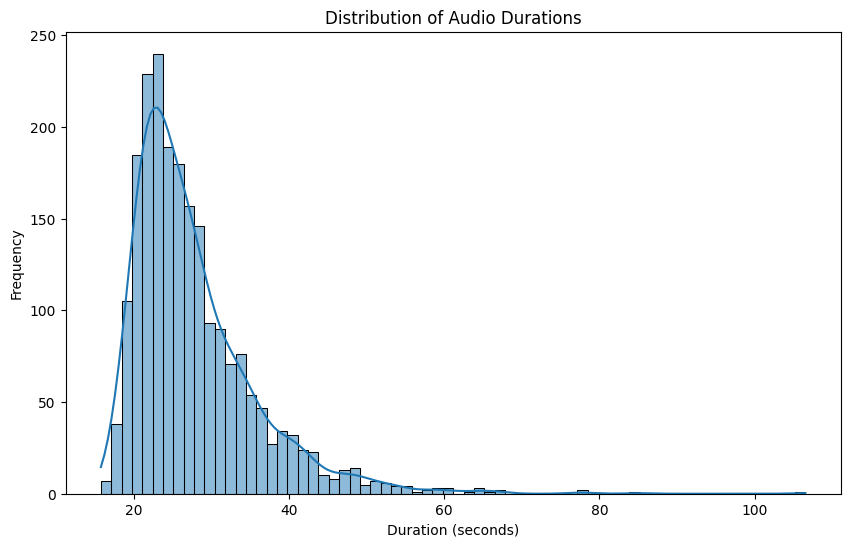

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate and print descriptive statistics for the 'duration' column
duration_stats = df['duration'].describe()
print("Descriptive Statistics for Audio Durations:")
print(duration_stats)

# 2. Create a histogram of the 'duration' column
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'].dropna(), kde=True)

# 3. Add appropriate labels to the x-axis and y-axis
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

# 4. Add a title to the plot
plt.title('Distribution of Audio Durations')

# 5. Display the plot
plt.show()

##Detect Silence Durations

In [17]:
import io
import torchaudio
import pandas as pd
import torch
import numpy as np

# Define the custom energy-based silence detection function
def detect_silence_duration_custom(waveform, sample_rate, threshold=-40.0, window_size=0.1):
    """
    Detects the duration of leading silence in a waveform based on energy.
    Args:
        waveform (torch.Tensor): The audio waveform (mono, i.e., shape (1, num_samples)).
        sample_rate (int): The sample rate of the audio.
        threshold (float): The energy threshold in dB below which samples are considered silent.
        window_size (float): The size of the window in seconds to calculate RMS energy.
    Returns:
        float: The duration of leading silence in seconds.
    """
    # Ensure waveform is mono
    if waveform.shape[0] > 1:
        waveform = torch.mean(waveform, dim=0, keepdim=True)

    # Calculate RMS energy in sliding windows
    window_samples = int(sample_rate * window_size)
    rms_values = []
    for i in range(0, waveform.shape[1] - window_samples + 1, window_samples):
        window = waveform[:, i:i+window_samples]
        rms = torch.sqrt(torch.mean(window**2)).item()
        rms_values.append(rms)

    # Convert RMS to dBFS (decibels relative to full scale)
    # Assuming 1.0 is the maximum amplitude for normalization
    dbfs_values = [20 * np.log10(rms) if rms > 0 else -float('inf') for rms in rms_values]

    # Find the first window that exceeds the threshold
    silence_end_window = 0
    for i, dbfs in enumerate(dbfs_values):
        if dbfs > threshold:
            silence_end_window = i # The index of the first non-silent window
            break
    else:
        # If all windows are silent, return the full duration
        return waveform.shape[1] / sample_rate

    # Calculate silence duration based on the number of silent windows
    silence_duration = silence_end_window * window_size
    return silence_duration

# Initialize lists to store durations
leading_silence_durations = []
trailing_silence_durations = []

# Iterate through each row of the DataFrame
for index, row in df.iterrows():
    audio_entry = row['audio']
    try:
        # Access the audio bytes and wrap them in an io.BytesIO object
        wav_bytes = io.BytesIO(audio_entry['bytes'])

        # Load the waveform and sample rate
        waveform, sample_rate = torchaudio.load(wav_bytes)

        # Ensure waveform is mono (if stereo, take the mean across channels)
        if waveform.shape[0] > 1:
            waveform = torch.mean(waveform, dim=0, keepdim=True)

        # Detect leading silence using the custom function
        leading_duration = detect_silence_duration_custom(waveform, sample_rate)
        leading_silence_durations.append(leading_duration)

        # Detect trailing silence by reversing the waveform and applying the custom function
        reversed_waveform = torch.flip(waveform, dims=[1])
        trailing_duration = detect_silence_duration_custom(reversed_waveform, sample_rate)
        trailing_silence_durations.append(trailing_duration)

    except Exception as e:
        print(f"Error processing audio at index {index}: {e}. Appending None for silence durations.")
        leading_silence_durations.append(None)
        trailing_silence_durations.append(None)

# Add the new columns to the DataFrame
df['leading_silence_duration'] = leading_silence_durations
df['trailing_silence_duration'] = trailing_silence_durations

# Display the first few rows of the updated DataFrame
print(df.head())

                                               audio          id     accent  \
0  {'bytes': b'RIFF\xd6\xf4\x1b\x00WAVEfmt \x10\x...  afrikaans1  afrikaans   
1  {'bytes': b'RIFF\x90\x8e\x1d\x00WAVEfmt \x10\x...  afrikaans2  afrikaans   
2  {'bytes': b'RIFF$-$\x00WAVEfmt \x10\x00\x00\x0...  afrikaans3  afrikaans   
3  {'bytes': b'RIFF\xb2\x96\x1f\x00WAVEfmt \x10\x...  afrikaans4  afrikaans   
4  {'bytes': b'RIFF\xbaA\x1b\x00WAVEfmt \x10\x00\...  afrikaans5  afrikaans   

    duration  leading_silence_duration  trailing_silence_duration  
0  20.772268                       0.9                        0.2  
1  21.961497                       0.5                        0.3  
2  26.880000                       0.5                        0.3  
3  23.471179                       0.5                        0.0  
4  20.252404                       0.0                        0.7  


## Global Silence Statistics

In [18]:
import pandas as pd

# 1. Calculate descriptive statistics for 'leading_silence_duration'
leading_silence_stats = df['leading_silence_duration'].describe()
print("\nDescriptive Statistics for Leading Silence Duration:")
print(leading_silence_stats)

# 2. Calculate descriptive statistics for 'trailing_silence_duration'
trailing_silence_stats = df['trailing_silence_duration'].describe()
print("\nDescriptive Statistics for Trailing Silence Duration:")
print(trailing_silence_stats)

# 3. Create a new column 'active_audio_duration'
df['active_audio_duration'] = df['duration'] - df['leading_silence_duration'] - df['trailing_silence_duration']

# 4. Calculate descriptive statistics for 'active_audio_duration'
active_audio_stats = df['active_audio_duration'].describe()
print("\nDescriptive Statistics for Active Audio Duration:")
print(active_audio_stats)

# Display the first few rows of the updated DataFrame with the new column
print("\nFirst 5 rows of the DataFrame with active_audio_duration:")
print(df.head())


Descriptive Statistics for Leading Silence Duration:
count    2138.000000
mean        0.525257
std         0.344728
min         0.000000
25%         0.300000
50%         0.500000
75%         0.700000
max         2.800000
Name: leading_silence_duration, dtype: float64

Descriptive Statistics for Trailing Silence Duration:
count    2138.000000
mean        0.621001
std         0.473701
min         0.000000
25%         0.400000
50%         0.600000
75%         0.800000
max         5.600000
Name: trailing_silence_duration, dtype: float64

Descriptive Statistics for Active Audio Duration:
count    2138.000000
mean       26.570160
std         7.796563
min        14.768277
25%        21.295187
50%        24.539660
75%        29.676905
max       105.836000
Name: active_audio_duration, dtype: float64

First 5 rows of the DataFrame with active_audio_duration:
                                               audio          id     accent  \
0  {'bytes': b'RIFF\xd6\xf4\x1b\x00WAVEfmt \x10\x...  afrik

## Per-Accent Silence Statistics


In [19]:
import pandas as pd

# Group the DataFrame by 'accent' and calculate descriptive statistics for silence and active audio durations
silence_stats_by_accent = df.groupby('accent')[['leading_silence_duration', 'trailing_silence_duration', 'active_audio_duration']].describe()

# Print the descriptive statistics for each accent
print("Descriptive Statistics for Silence and Active Audio Durations by Accent:")
print(silence_stats_by_accent)

Descriptive Statistics for Silence and Active Audio Durations by Accent:
          leading_silence_duration                                          \
                             count      mean       std  min  25%  50%  75%   
accent                                                                       
afrikaans                      5.0  0.480000  0.319374  0.0  0.5  0.5  0.5   
agni                           1.0  0.000000       NaN  0.0  0.0  0.0  0.0   
akan                           1.0  0.200000       NaN  0.2  0.2  0.2  0.2   
albanian                       9.0  0.577778  0.156347  0.5  0.5  0.5  0.5   
amazigh                        2.0  0.600000  0.000000  0.6  0.6  0.6  0.6   
...                            ...       ...       ...  ...  ...  ...  ...   
yapese                         1.0  0.000000       NaN  0.0  0.0  0.0  0.0   
yiddish                        5.0  0.640000  0.054772  0.6  0.6  0.6  0.7   
yoruba                         5.0  0.740000  0.230217  0.5  0.5  0.8

## Visualize Silence Distributions



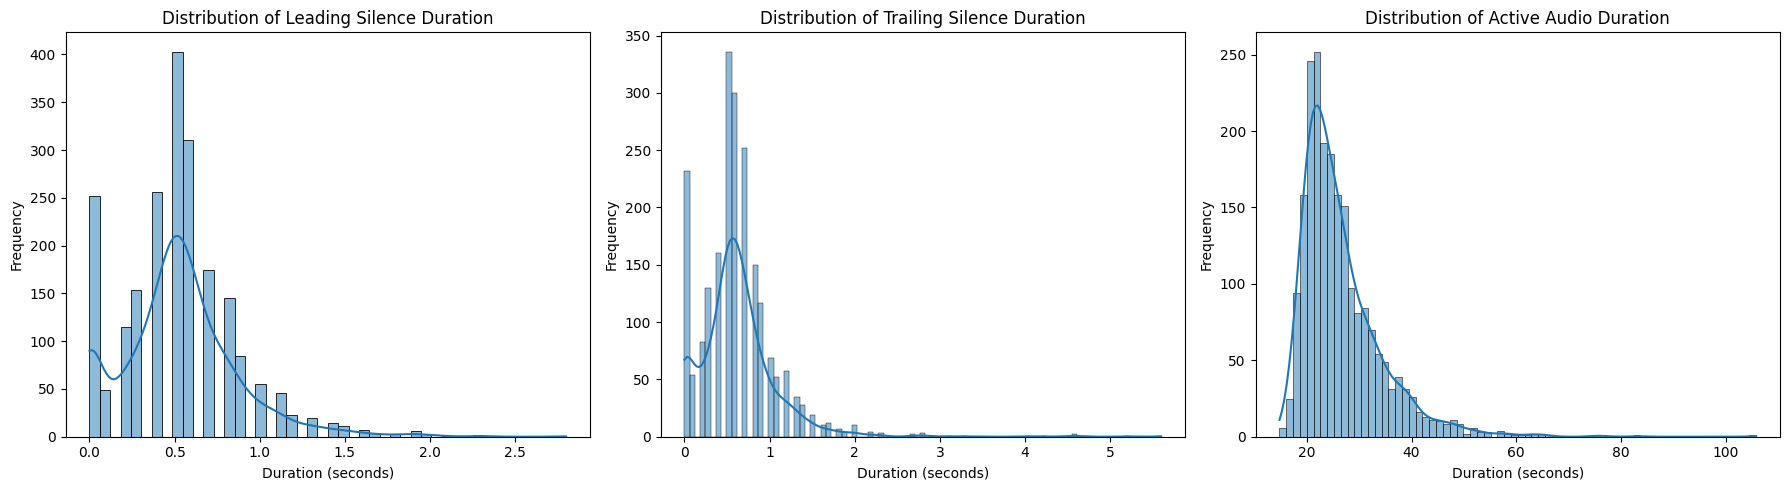


Top 5 Accents: ['english', 'spanish', 'arabic', 'mandarin', 'french']


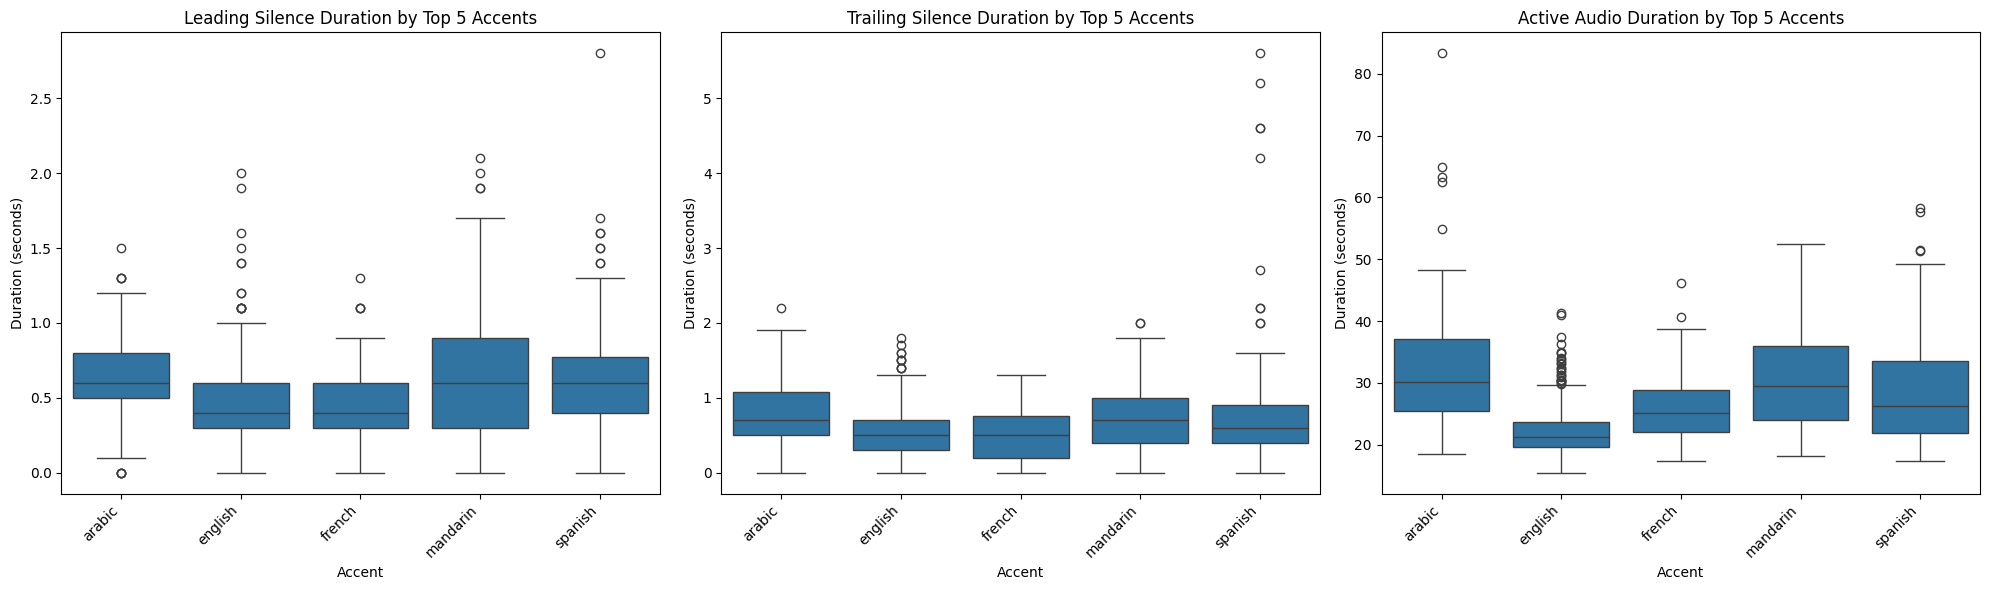

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Global Distributions (Histograms)
plt.figure(figsize=(18, 5))

# Leading Silence Duration Histogram
plt.subplot(1, 3, 1)
sns.histplot(df['leading_silence_duration'].dropna(), kde=True)
plt.title('Distribution of Leading Silence Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

# Trailing Silence Duration Histogram
plt.subplot(1, 3, 2)
sns.histplot(df['trailing_silence_duration'].dropna(), kde=True)
plt.title('Distribution of Trailing Silence Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

# Active Audio Duration Histogram
plt.subplot(1, 3, 3)
sns.histplot(df['active_audio_duration'].dropna(), kde=True)
plt.title('Distribution of Active Audio Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Comparison Across Top 5 Accents (Box Plots)

# Identify the top 5 most frequent accents
top_5_accents = df['accent'].value_counts().nlargest(5).index.tolist()
print(f"\nTop 5 Accents: {top_5_accents}")

# Filter the DataFrame for these top 5 accents
df_top_5_accents = df[df['accent'].isin(top_5_accents)]

plt.figure(figsize=(20, 6))

# Leading Silence Duration Box Plot for Top 5 Accents
plt.subplot(1, 3, 1)
sns.boxplot(x='accent', y='leading_silence_duration', data=df_top_5_accents)
plt.title('Leading Silence Duration by Top 5 Accents')
plt.xlabel('Accent')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45, ha='right')

# Trailing Silence Duration Box Plot for Top 5 Accents
plt.subplot(1, 3, 2)
sns.boxplot(x='accent', y='trailing_silence_duration', data=df_top_5_accents)
plt.title('Trailing Silence Duration by Top 5 Accents')
plt.xlabel('Accent')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45, ha='right')

# Active Audio Duration Box Plot for Top 5 Accents
plt.subplot(1, 3, 3)
sns.boxplot(x='accent', y='active_audio_duration', data=df_top_5_accents)
plt.title('Active Audio Duration by Top 5 Accents')
plt.xlabel('Accent')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Silence Detection for Total Silence


In [21]:
import io
import torchaudio
import pandas as pd
import torch
import numpy as np

# Existing detect_silence_duration_custom for leading/trailing silence (for context, not re-executing)
def detect_silence_duration_custom(waveform, sample_rate, threshold=-40.0, window_size=0.1):
    if waveform.shape[0] > 1:
        waveform = torch.mean(waveform, dim=0, keepdim=True)

    window_samples = int(sample_rate * window_size)
    rms_values = []
    for i in range(0, waveform.shape[1] - window_samples + 1, window_samples):
        window = waveform[:, i:i+window_samples]
        rms = torch.sqrt(torch.mean(window**2)).item()
        rms_values.append(rms)

    dbfs_values = [20 * np.log10(rms) if rms > 0 else -float('inf') for rms in rms_values]

    silence_end_window = 0
    for i, dbfs in enumerate(dbfs_values):
        if dbfs > threshold:
            silence_end_window = i
            break
    else:
        return waveform.shape[1] / sample_rate

    silence_duration = silence_end_window * window_size
    return silence_duration

# New function to calculate total silence duration
def calculate_total_silence_duration_custom(waveform, sample_rate, threshold_db=-40.0, window_size=0.1):
    """
    Calculates the total duration of all silence periods within a waveform based on RMS energy.

    Args:
        waveform (torch.Tensor): The audio waveform (mono, i.e., shape (1, num_samples)).
        sample_rate (int): The sample rate of the audio.
        threshold_db (float): The energy threshold in dB below which samples are considered silent.
        window_size (float): The size of the window in seconds to calculate RMS energy.

    Returns:
        float: The total duration of silence in seconds.
    """
    # Ensure waveform is mono
    if waveform.shape[0] > 1:
        waveform = torch.mean(waveform, dim=0, keepdim=True)

    # Calculate RMS energy in non-overlapping windows
    window_samples = int(sample_rate * window_size)
    total_silence_duration = 0.0

    # Handle edge case where waveform is shorter than window_samples
    if waveform.shape[1] < window_samples:
        # Treat as silent if its RMS is below threshold
        rms = torch.sqrt(torch.mean(waveform**2)).item()
        dbfs = 20 * np.log10(rms) if rms > 0 else -float('inf')
        if dbfs < threshold_db:
            return waveform.shape[1] / sample_rate
        else:
            return 0.0

    for i in range(0, waveform.shape[1], window_samples):
        window = waveform[:, i:min(i + window_samples, waveform.shape[1])]
        if window.numel() == 0:
            continue

        # Calculate RMS for the current window
        rms = torch.sqrt(torch.mean(window**2)).item()

        # Convert RMS to dBFS
        dbfs = 20 * np.log10(rms) if rms > 0 else -float('inf')

        # If the window is silent, add its duration to the total
        if dbfs < threshold_db:
            total_silence_duration += window.shape[1] / sample_rate

    return total_silence_duration

print("Defined `calculate_total_silence_duration_custom` function.")

Defined `calculate_total_silence_duration_custom` function.


In [22]:
import io
import torchaudio
import pandas as pd
import torch
import numpy as np

# Initialize a list to store total silence durations
total_silence_durations = []

# Iterate through each row of the DataFrame
for index, row in df.iterrows():
    audio_entry = row['audio']
    try:
        # Access the audio bytes and wrap them in an io.BytesIO object
        wav_bytes = io.BytesIO(audio_entry['bytes'])

        # Load the waveform and sample rate
        waveform, sample_rate = torchaudio.load(wav_bytes)

        # Calculate total silence duration using the custom function
        total_silence_duration = calculate_total_silence_duration_custom(waveform, sample_rate)
        total_silence_durations.append(total_silence_duration)

    except Exception as e:
        print(f"Error processing audio for total silence at index {index}: {e}. Appending None.")
        total_silence_durations.append(None)

# Add the new column to the DataFrame
df['total_silence_duration'] = total_silence_durations

# Calculate internal_silence_duration
df['internal_silence_duration'] = df['total_silence_duration'] - df['leading_silence_duration'] - df['trailing_silence_duration']

# Display the first few rows of the updated DataFrame
print(df.head())

                                               audio          id     accent  \
0  {'bytes': b'RIFF\xd6\xf4\x1b\x00WAVEfmt \x10\x...  afrikaans1  afrikaans   
1  {'bytes': b'RIFF\x90\x8e\x1d\x00WAVEfmt \x10\x...  afrikaans2  afrikaans   
2  {'bytes': b'RIFF$-$\x00WAVEfmt \x10\x00\x00\x0...  afrikaans3  afrikaans   
3  {'bytes': b'RIFF\xb2\x96\x1f\x00WAVEfmt \x10\x...  afrikaans4  afrikaans   
4  {'bytes': b'RIFF\xbaA\x1b\x00WAVEfmt \x10\x00\...  afrikaans5  afrikaans   

    duration  leading_silence_duration  trailing_silence_duration  \
0  20.772268                       0.9                        0.2   
1  21.961497                       0.5                        0.3   
2  26.880000                       0.5                        0.3   
3  23.471179                       0.5                        0.0   
4  20.252404                       0.0                        0.7   

   active_audio_duration  total_silence_duration  internal_silence_duration  
0              19.672268        

## Global Total/Internal Silence Statistics

In [23]:
import pandas as pd

print("\nDescriptive Statistics for Total Silence Duration:")
print(df['total_silence_duration'].describe())

print("\nDescriptive Statistics for Internal Silence Duration:")
print(df['internal_silence_duration'].describe())

print("\nDescriptive Statistics for Leading Silence Duration:")
print(df['leading_silence_duration'].describe())

print("\nDescriptive Statistics for Trailing Silence Duration:")
print(df['trailing_silence_duration'].describe())

print("\nDescriptive Statistics for Active Audio Duration:")
print(df['active_audio_duration'].describe())


Descriptive Statistics for Total Silence Duration:
count    2138.000000
mean        6.517923
std         4.684689
min         0.000000
25%         3.640839
50%         5.430726
75%         8.281383
max        36.866689
Name: total_silence_duration, dtype: float64

Descriptive Statistics for Internal Silence Duration:
count    2138.000000
mean        5.371665
std         4.310289
min        -0.076531
25%         2.730828
50%         4.300000
75%         6.880057
max        35.166689
Name: internal_silence_duration, dtype: float64

Descriptive Statistics for Leading Silence Duration:
count    2138.000000
mean        0.525257
std         0.344728
min         0.000000
25%         0.300000
50%         0.500000
75%         0.700000
max         2.800000
Name: leading_silence_duration, dtype: float64

Descriptive Statistics for Trailing Silence Duration:
count    2138.000000
mean        0.621001
std         0.473701
min         0.000000
25%         0.400000
50%         0.600000
75%         0.

## Per-Accent Total/Internal Silence Statistics


In [24]:
import pandas as pd

# Group the DataFrame by 'accent' and calculate descriptive statistics
silence_stats_by_accent_updated = df.groupby('accent')[['leading_silence_duration', 'trailing_silence_duration', 'total_silence_duration', 'internal_silence_duration', 'active_audio_duration']].describe()

# Print the updated descriptive statistics for each accent
print("Descriptive Statistics for Silence and Active Audio Durations by Accent (Updated):")
print(silence_stats_by_accent_updated)

Descriptive Statistics for Silence and Active Audio Durations by Accent (Updated):
          leading_silence_duration                                          \
                             count      mean       std  min  25%  50%  75%   
accent                                                                       
afrikaans                      5.0  0.480000  0.319374  0.0  0.5  0.5  0.5   
agni                           1.0  0.000000       NaN  0.0  0.0  0.0  0.0   
akan                           1.0  0.200000       NaN  0.2  0.2  0.2  0.2   
albanian                       9.0  0.577778  0.156347  0.5  0.5  0.5  0.5   
amazigh                        2.0  0.600000  0.000000  0.6  0.6  0.6  0.6   
...                            ...       ...       ...  ...  ...  ...  ...   
yapese                         1.0  0.000000       NaN  0.0  0.0  0.0  0.0   
yiddish                        5.0  0.640000  0.054772  0.6  0.6  0.6  0.7   
yoruba                         5.0  0.740000  0.230217  0.5

## Internal Silence Distributions

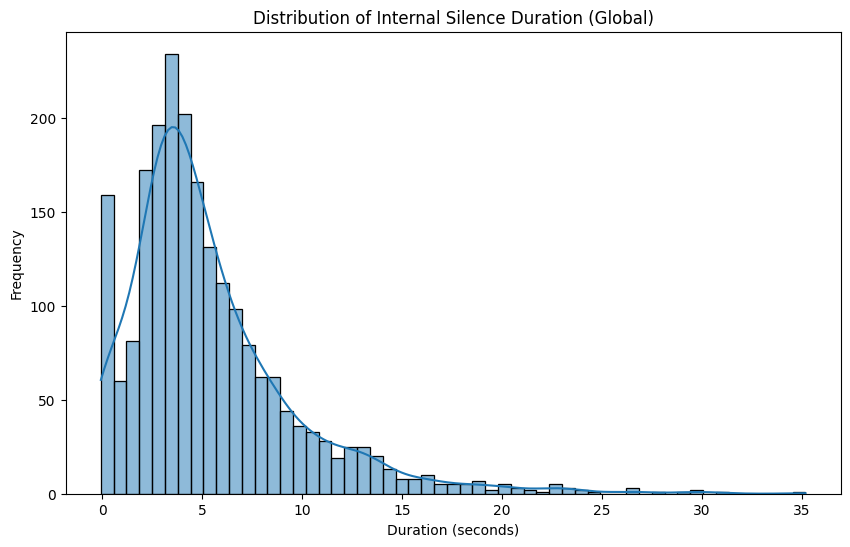


Top 5 Accents: ['english', 'spanish', 'arabic', 'mandarin', 'french']


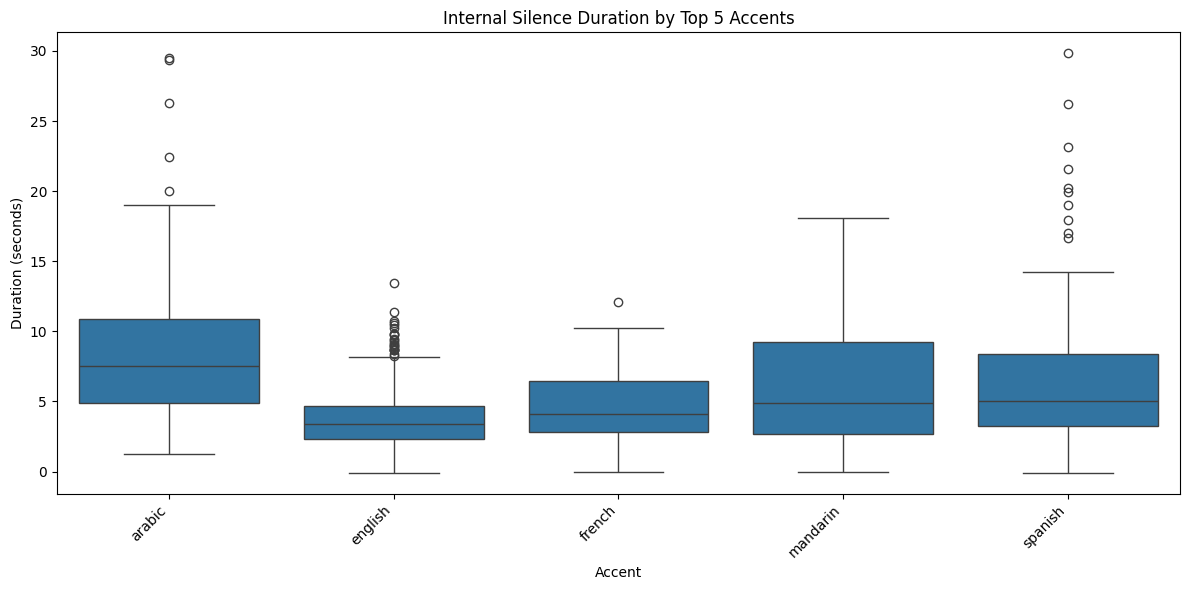

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Global Distribution of Internal Silence Duration (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['internal_silence_duration'].dropna(), kde=True)
plt.title('Distribution of Internal Silence Duration (Global)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# 2. Comparison Across Top 5 Accents (Box Plot)

# Identify the top 5 most frequent accents
top_5_accents = df['accent'].value_counts().nlargest(5).index.tolist()
print(f"\nTop 5 Accents: {top_5_accents}")

# Filter the DataFrame for these top 5 accents
df_top_5_accents = df[df['accent'].isin(top_5_accents)].copy()

plt.figure(figsize=(12, 6))
sns.boxplot(x='accent', y='internal_silence_duration', data=df_top_5_accents)
plt.title('Internal Silence Duration by Top 5 Accents')
plt.xlabel('Accent')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Target Sample Rate 16Khz

In [26]:
import os

# 1. Define the target directory for trimmed audio files
trimmed_audio_output = 'trimmed_audio_output'

# Create the directory if it doesn't exist
if not os.path.exists(trimmed_audio_output):
    os.makedirs(trimmed_audio_output)
    print(f"Created output directory: {trimmed_audio_output}")
else:
    print(f"Output directory already exists: {trimmed_audio_output}")

# 2. Reconfirm the TARGET_SAMPLE_RATE
TARGET_SAMPLE_RATE = 16000  # Hz

print(f"Trimmed audio output directory: {trimmed_audio_output}")
print(f"Target sample rate for resampling: {TARGET_SAMPLE_RATE} Hz")

Created output directory: trimmed_audio_output
Trimmed audio output directory: trimmed_audio_output
Target sample rate for resampling: 16000 Hz


## Audio Trimming and Saving

### Subtask:
Detect leading and trailing silences, trim the waveform, resample it to the `TARGET_SAMPLE_RATE`


In [27]:
import torchaudio
import torchaudio.transforms as T
import os
import torch
import numpy as np

# Re-define the custom energy-based silence detection function for use within the new function
def detect_silence_duration_custom(waveform, sample_rate, threshold=-40.0, window_size=0.1):
    if waveform.shape[0] > 1:
        waveform = torch.mean(waveform, dim=0, keepdim=True)

    window_samples = int(sample_rate * window_size)
    rms_values = []
    # Ensure at least one window can be formed
    if waveform.shape[1] < window_samples:
        if waveform.numel() == 0: # Handle empty waveform
            return 0.0
        rms = torch.sqrt(torch.mean(waveform**2)).item()
        dbfs = 20 * np.log10(rms) if rms > 0 else -float('inf')
        if dbfs < threshold:
            return waveform.shape[1] / sample_rate # Entire short waveform is silent
        else:
            return 0.0

    for i in range(0, waveform.shape[1] - window_samples + 1, window_samples):
        window = waveform[:, i:i+window_samples]
        rms = torch.sqrt(torch.mean(window**2)).item()
        rms_values.append(rms)

    dbfs_values = [20 * np.log10(rms) if rms > 0 else -float('inf') for rms in rms_values]

    silence_end_window = 0
    for i, dbfs in enumerate(dbfs_values):
        if dbfs > threshold:
            silence_end_window = i # The index of the first non-silent window
            break
    else:
        # If all windows are silent, return the full duration
        return waveform.shape[1] / sample_rate

    silence_duration = silence_end_window * window_size
    return silence_duration

def process_and_save_audio(waveform, original_sample_rate, audio_id, output_dir, target_sample_rate):
    """
    Detects leading/trailing silences, trims, resamples, and saves an audio waveform.

    Args:
        waveform (torch.Tensor): The audio waveform (mono, shape [1, num_samples]).
        original_sample_rate (int): The original sample rate of the audio.
        audio_id (str): A unique identifier for the audio file (e.g., 'afrikaans1').
        output_dir (str): The directory where the processed audio will be saved.
        target_sample_rate (int): The target sample rate for resampling.

    Returns:
        str: The path to the saved audio file, or None if processing failed.
    """
    try:
        # Ensure waveform is mono (if stereo, take the mean across channels)
        if waveform.shape[0] > 1:
            waveform = torch.mean(waveform, dim=0, keepdim=True)

        # 1. Detect leading silence duration
        leading_silence_duration = detect_silence_duration_custom(waveform, original_sample_rate)

        # 2. Detect trailing silence duration by reversing the waveform
        reversed_waveform = torch.flip(waveform, dims=[1])
        trailing_silence_duration = detect_silence_duration_custom(reversed_waveform, original_sample_rate)

        # 3. Calculate start and end sample indices for active audio
        start_sample_idx = int(leading_silence_duration * original_sample_rate)
        end_sample_idx = int(waveform.shape[1] - (trailing_silence_duration * original_sample_rate))

        # Ensure indices are within bounds and start_sample_idx <= end_sample_idx
        start_sample_idx = max(0, start_sample_idx)
        end_sample_idx = min(waveform.shape[1], end_sample_idx)

        if start_sample_idx >= end_sample_idx: # If no active audio or all silence
            # If the entire audio is detected as silence after trimming
            # or if the calculated end_sample_idx is less than or equal to start_sample_idx,
            # we can decide to either: a) return None, b) return a minimal silence file,
            # or c) return the original audio (or a very short segment of it) to avoid empty files.
            # For this task, we'll return None to indicate no meaningful active audio.
            print(f"Warning: No active audio detected for {audio_id}. Skipping save.")
            return None

        # 4. Trim the waveform to keep only the active audio segment
        trimmed_waveform = waveform[:, start_sample_idx:end_sample_idx]

        # 5. Resample the trimmed waveform to the target_sample_rate
        if original_sample_rate != target_sample_rate:
            resampler = T.Resample(orig_freq=original_sample_rate, new_freq=target_sample_rate)
            resampled_waveform = resampler(trimmed_waveform)
        else:
            resampled_waveform = trimmed_waveform

        # 6. Construct the full output file path
        output_file_path = os.path.join(output_dir, f'{audio_id}.wav')

        # 7. Save the resampled audio waveform
        torchaudio.save(output_file_path, resampled_waveform, target_sample_rate)

        # 8. Return the full path of the saved audio file
        return output_file_path
    except Exception as e:
        print(f"Error processing {audio_id}: {e}")
        return None

print("Defined `process_and_save_audio` function.")

Defined `process_and_save_audio` function.


In [28]:
import io
import torchaudio
import pandas as pd
import torch
import numpy as np

# Initialize an empty list to store the paths of the saved audio files
processed_audio_paths = []

# Iterate through each row of the df DataFrame
for index, row in df.iterrows():
    audio_entry = row['audio']
    audio_id = row['id']
    try:
        # Access the audio bytes and wrap them in an io.BytesIO object
        wav_bytes = io.BytesIO(audio_entry['bytes'])

        # Load the waveform and original sample rate
        waveform, original_sample_rate = torchaudio.load(wav_bytes)

        # Call the process_and_save_audio function
        saved_path = process_and_save_audio(
            waveform, original_sample_rate, audio_id,
            trimmed_audio_output, TARGET_SAMPLE_RATE
        )
        processed_audio_paths.append(saved_path)

    except Exception as e:
        print(f"Error processing audio at index {index} (ID: {audio_id}): {e}. Appending None.")
        processed_audio_paths.append(None)

# Create a new column in df named 'processed_audio_path'
df['processed_audio_path'] = processed_audio_paths

# Drop the original 'audio' column
df = df.drop(columns=['audio'])

# Display the first few rows of the updated df DataFrame
print("First few rows of the updated DataFrame with processed audio paths:")
print(df.head())

First few rows of the updated DataFrame with processed audio paths:
           id     accent   duration  leading_silence_duration  \
0  afrikaans1  afrikaans  20.772268                       0.9   
1  afrikaans2  afrikaans  21.961497                       0.5   
2  afrikaans3  afrikaans  26.880000                       0.5   
3  afrikaans4  afrikaans  23.471179                       0.5   
4  afrikaans5  afrikaans  20.252404                       0.0   

   trailing_silence_duration  active_audio_duration  total_silence_duration  \
0                        0.2              19.672268                4.072268   
1                        0.3              21.161497                3.061497   
2                        0.3              26.080000                6.480000   
3                        0.0              22.971179                1.700000   
4                        0.7              19.552404                4.652404   

   internal_silence_duration                 processed_audio_path 

## Output Parquet for Trimmed and Resampled Audio

In [29]:
import os

# 1. Define the target directory for processed parquet files
processed_parquet_output = 'processed_parquet_output'

# 2. Create the directory if it doesn't exist
if not os.path.exists(processed_parquet_output):
    os.makedirs(processed_parquet_output)
    print(f"Created output directory: {processed_parquet_output}")
else:
    print(f"Output directory already exists: {processed_parquet_output}")

Created output directory: processed_parquet_output


In [30]:
import pandas as pd
import os

# Define the output file path for the processed DataFrame
output_parquet_file = os.path.join(processed_parquet_output, 'processed_audio_metadata.parquet')

# Save the DataFrame to a Parquet file
df.to_parquet(output_parquet_file, index=False)

print(f"Processed DataFrame saved to: {output_parquet_file}")

Processed DataFrame saved to: processed_parquet_output/processed_audio_metadata.parquet


## Consolidate Setup Code for GPU Restart

New code cell that includes all necessary imports (pandas, torchaudio, torch, numpy, os), re-defines the `detect_silence_duration_custom` and `calculate_total_silence_duration_custom` functions, re-defines `trimmed_audio_output`, `TARGET_SAMPLE_RATE`, `processed_parquet_output`, and the `output_parquet_file` path. Finally, it will load the `df` DataFrame from `processed_parquet_output/processed_audio_metadata.parquet`.


In [6]:
!pip install torchcodec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 90.0 MB/s eta 0:00:00


In [8]:
# # IMPORTANT: Before executing this cell, we can switch to GPU runtime for faster processing

import pandas as pd
import torchaudio
import torch
import numpy as np
import os
import io
from google.colab import drive
from tqdm.auto import tqdm # For progress bars

# Explicitly install torchcodec to ensure it's available after a runtime restart
!pip install torchcodec

# Mount Google Drive to access persistent files
drive.mount('/content/drive')

# Change to the project directory where processed files are stored
# Ensure this path matches where the original data was loaded and processed
os.chdir('/content/drive/MyDrive/SpeechAccentRecognition')

# Define the device dynamically (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Re-define the custom energy-based silence detection function for leading/trailing silence (GPU-optimized)
def detect_silence_duration_custom(waveform, sample_rate, threshold=-40.0, window_size=0.1):
    if waveform.shape[0] > 1:
        waveform = torch.mean(waveform, dim=0, keepdim=True)

    # Move waveform to the specified device
    waveform = waveform.to(device)

    window_samples = int(sample_rate * window_size)
    rms_values = []
    # Ensure at least one window can be formed
    if waveform.shape[1] < window_samples:
        if waveform.numel() == 0: # Handle empty waveform
            return 0.0
        rms = torch.sqrt(torch.mean(waveform**2)).item()
        dbfs = 20 * np.log10(rms) if rms > 0 else -float('inf')
        if dbfs < threshold:
            return waveform.shape[1] / sample_rate # Entire short waveform is silent
        else:
            return 0.0

    for i in range(0, waveform.shape[1] - window_samples + 1, window_samples):
        window = waveform[:, i:i+window_samples]
        rms = torch.sqrt(torch.mean(window**2)).item()
        rms_values.append(rms)

    dbfs_values = [20 * np.log10(rms) if rms > 0 else -float('inf') for rms in rms_values]

    silence_end_window = 0
    for i, dbfs in enumerate(dbfs_values):
        if dbfs > threshold:
            silence_end_window = i # The index of the first non-silent window
            break
    else:
        # If all windows are silent, return the full duration
        return waveform.shape[1] / sample_rate

    silence_duration = silence_end_window * window_size
    return silence_duration

# Re-define the custom function to calculate total silence duration (GPU-optimized)
def calculate_total_silence_duration_custom(waveform, sample_rate, threshold_db=-40.0, window_size=0.1):
    """
    Calculates the total duration of all silence periods within a waveform based on RMS energy.
    Args:
        waveform (torch.Tensor): The audio waveform (mono, i.e., shape (1, num_samples)).
        sample_rate (int): The sample rate of the audio.
        threshold_db (float): The energy threshold in dB below which samples are considered silent.
        window_size (float): The size of the window in seconds to calculate RMS energy.
    Returns:
        float: The total duration of silence in seconds.
    """
    # Ensure waveform is mono
    if waveform.shape[0] > 1:
        waveform = torch.mean(waveform, dim=0, keepdim=True)

    # Move waveform to the specified device
    waveform = waveform.to(device)

    # Calculate RMS energy in non-overlapping windows
    window_samples = int(sample_rate * window_size)
    total_silence_duration = 0.0

    # Handle edge case where waveform is shorter than window_samples
    if waveform.shape[1] < window_samples:
        # Treat as silent if its RMS is below threshold
        rms = torch.sqrt(torch.mean(waveform**2)).item()
        dbfs = 20 * np.log10(rms) if rms > 0 else -float('inf')
        if dbfs < threshold_db:
            return waveform.shape[1] / sample_rate
        else:
            return 0.0

    for i in range(0, waveform.shape[1], window_samples):
        window = waveform[:, i:min(i + window_samples, waveform.shape[1])]
        if window.numel() == 0:
            continue

        # Calculate RMS for the current window
        rms = torch.sqrt(torch.mean(window**2)).item()

        # Convert RMS to dBFS
        dbfs = 20 * np.log10(rms) if rms > 0 else -float('inf')

        # If the window is silent, add its duration to the total
        if dbfs < threshold_db:
            total_silence_duration += window.shape[1] / sample_rate

    return total_silence_duration

# Re-define variables
trimmed_audio_output = 'trimmed_audio_output'
TARGET_SAMPLE_RATE = 16000
processed_parquet_output = 'processed_parquet_output'
output_parquet_file = os.path.join(processed_parquet_output, 'processed_audio_metadata.parquet')

# Ensure the directory exists before trying to load (it should exist on Drive but good practice)
if not os.path.exists(processed_parquet_output):
    os.makedirs(processed_parquet_output, exist_ok=True)
    print(f"Re-created output directory: {processed_parquet_output}")

# Load the DataFrame
df = pd.read_parquet(output_parquet_file)

print(f"DataFrame loaded from: {output_parquet_file}")
print(f"DataFrame shape: {df.shape}")
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using device: cuda
DataFrame loaded from: processed_parquet_output/processed_audio_metadata.parquet
DataFrame shape: (2138, 9)
           id     accent   duration  leading_silence_duration  \
0  afrikaans1  afrikaans  20.772268                       0.9   
1  afrikaans2  afrikaans  21.961497                       0.5   
2  afrikaans3  afrikaans  26.880000                       0.5   
3  afrikaans4  afrikaans  23.471179                       0.5   
4  afrikaans5  afrikaans  20.252404                       0.0   

   trailing_silence_duration  active_audio_duration  total_silence_duration  \
0                        0.2              19.672268                4.072268   
1                        0.3              21.161497                3.061497   
2                        0.3              26.080000                6.480000   
3                        0.0         

Re-verify the silence detection with the GPU-optimized functions for the trimmed audio.



In [9]:
import torchaudio
import torch
import numpy as np
import pandas as pd
import os
from tqdm.auto import tqdm # Import tqdm for progress bar

# Initialize lists to store recalculated durations
recalculated_leading_silence = []
recalculated_trailing_silence = []

# Iterate through each row of the DataFrame with a progress bar
for index, row in tqdm(df.iterrows(), total=len(df), desc="Recalculating silence durations"):
    audio_path = row['processed_audio_path']

    # Skip if audio_path is None (e.g., if original processing failed)
    if audio_path is None or not os.path.exists(audio_path):
        # print(f"Skipping index {index}: Invalid or missing audio path {audio_path}.") # Commented out to reduce verbose output
        recalculated_leading_silence.append(None)
        recalculated_trailing_silence.append(None)
        continue

    try:
        # Load the audio waveform and its sample rate. It will be loaded onto CPU initially.
        waveform, sample_rate = torchaudio.load(audio_path)

        # Ensure waveform is mono (if stereo, take the mean across channels)
        if waveform.shape[0] > 1:
            waveform = torch.mean(waveform, dim=0, keepdim=True)

        # Recalculate leading silence duration using the custom function
        # The function detect_silence_duration_custom will move the waveform to 'device' (GPU if available)
        leading_duration = detect_silence_duration_custom(waveform, sample_rate)
        recalculated_leading_silence.append(leading_duration)

        # Recalculate trailing silence by reversing the waveform and applying the custom function
        # The waveform will be moved to 'device' within the function
        reversed_waveform = torch.flip(waveform, dims=[1])
        trailing_duration = detect_silence_duration_custom(reversed_waveform, sample_rate)
        recalculated_trailing_silence.append(trailing_duration)

    except Exception as e:
        print(f"Error processing audio from {audio_path} at index {index}: {e}. Appending None for recalculated silence durations.")
        recalculated_leading_silence.append(None)
        recalculated_trailing_silence.append(None)

# Add the new columns to the DataFrame
df['recalculated_leading_silence'] = recalculated_leading_silence
df['recalculated_trailing_silence'] = recalculated_trailing_silence

# Display the first few rows of the updated DataFrame
print("\nFirst few rows of the DataFrame with recalculated silence durations:")
print(df.head())

Recalculating silence durations:   0%|          | 0/2138 [00:00<?, ?it/s]


First few rows of the DataFrame with recalculated silence durations:
           id     accent   duration  leading_silence_duration  \
0  afrikaans1  afrikaans  20.772268                       0.9   
1  afrikaans2  afrikaans  21.961497                       0.5   
2  afrikaans3  afrikaans  26.880000                       0.5   
3  afrikaans4  afrikaans  23.471179                       0.5   
4  afrikaans5  afrikaans  20.252404                       0.0   

   trailing_silence_duration  active_audio_duration  total_silence_duration  \
0                        0.2              19.672268                4.072268   
1                        0.3              21.161497                3.061497   
2                        0.3              26.080000                6.480000   
3                        0.0              22.971179                1.700000   
4                        0.7              19.552404                4.652404   

   internal_silence_duration                 processed_audio_pat

## Display Recalculated Global Silence Statistics


In [20]:
import pandas as pd

# Calculate and print descriptive statistics for 'recalculated_leading_silence'
print("\nDescriptive Statistics for Recalculated Leading Silence Duration:")
print(df['recalculated_leading_silence'].describe())

# Calculate and print descriptive statistics for 'recalculated_trailing_silence'
print("\nDescriptive Statistics for Recalculated Trailing Silence Duration:")
print(df['recalculated_trailing_silence'].describe())


Descriptive Statistics for Recalculated Leading Silence Duration:
count    2116.000000
mean        0.002788
std         0.036602
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: recalculated_leading_silence, dtype: float64

Descriptive Statistics for Recalculated Trailing Silence Duration:
count    2116.000000
mean        0.001040
std         0.017634
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.600000
Name: recalculated_trailing_silence, dtype: float64


## Display Recalculated Per-Accent Silence Statistics

In [21]:
import pandas as pd

# Group the DataFrame by 'accent' and calculate descriptive statistics for the recalculated silence durations
recalculated_silence_stats_by_accent = df.groupby('accent')[['recalculated_leading_silence', 'recalculated_trailing_silence']].describe()

# Print the descriptive statistics for each accent
print("Descriptive Statistics for Recalculated Silence Durations by Accent:")
print(recalculated_silence_stats_by_accent)

Descriptive Statistics for Recalculated Silence Durations by Accent:
          recalculated_leading_silence                                     \
                                 count mean  std  min  25%  50%  75%  max   
accent                                                                      
afrikaans                          5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
agni                               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   
akan                               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   
albanian                           9.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
amazigh                            2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                                ...  ...  ...  ...  ...  ...  ...  ...   
yapese                             1.0  0.3  NaN  0.3  0.3  0.3  0.3  0.3   
yiddish                            5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
yoruba                             5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
yupik  

Yes, the leading and trailing silences have been effectively removed as intended for the vast majority of audio files. The recalculated global statistics show a mean leading silence of 0.002788 seconds and a median of 0.000000 seconds, with similar figures for trailing silence (mean of 0.001040 seconds, median of 0.000000 seconds). This indicates that for most files, the silences are now virtually zero.

# Intelligent silence-based segmentation and fixed-window splitting

Apply Voice Activity Detection (VAD) to identify active speech regions and split the audio into 'speech bursts' based on internal silences (e.g., greater than 1-2 seconds).

For any speech burst longer than the `MAX_SEGMENT_DURATION` (7 seconds), applies fixed-window splitting using a `SEGMENT_OVERLAP_DURATION` of 2.5 seconds to create multiple 7-second segments.

Pads any speech burst or segment shorter than 7 seconds with silence to precisely 7 seconds.

Save to new, dedicated directory (e.g., `segmented_audio_output`). Each saved filename includes the `original_id` (from the original audio file) and a unique `segment_id` (e.g., `original_id_segmentX.wav`) and preserves the `accent` label for each segment. This will allow us to prevent data leakage even from overlap sections later.

2.  **Segment Metadata Management**:
      *   `original_id`: The ID of the original audio file from which this segment was derived.
      *   `accent`: The accent label inherited from the original audio.
      *   `segment_id`: A unique identifier for this specific 7-second segment.
      *   `segment_path`: The full path to the saved 7-second WAV file on disk.
      *   `segment_start_time_in_original_audio`: The start time of this segment within its original (pre-segmentation) audio file.
      *   `segment_end_time_in_original_audio`: The end time of this segment within its original (pre-segmentation) audio file.
      *   Recalculate and include silence statistics for *each 7-second segment*: (e.g., `recalculated_leading_silence_segment`, `recalculated_trailing_silence_segment`, `recalculated_internal_silence_segment`).
  Save this comprehensive DataFrame as a new parquet file named `all_segmented_audio_metadata.parquet` ( in a new `segmented_parquet_output` directory).

In [22]:
import os

# 1. Define global constants for audio preprocessing and segmentation
TARGET_SAMPLE_RATE = 16000  # Hz
MAX_SEGMENT_DURATION = 7    # seconds
SEGMENT_OVERLAP_DURATION = 2.5 # seconds
MIN_INTERNAL_SILENCE_FOR_SPLIT = 0.8 # seconds

# 2. Define output directory for segmented audio files
segmented_audio_output = 'segmented_audio_output'

# 3. Define output directory for segmented metadata
segmented_parquet_output = 'segmented_parquet_output'

# 4. Create both directories if they do not already exist
if not os.path.exists(segmented_audio_output):
    os.makedirs(segmented_audio_output)
    print(f"Created output directory: {segmented_audio_output}")
else:
    print(f"Output directory already exists: {segmented_audio_output}")

if not os.path.exists(segmented_parquet_output):
    os.makedirs(segmented_parquet_output)
    print(f"Created output directory: {segmented_parquet_output}")
else:
    print(f"Output directory already exists: {segmented_parquet_output}")

print(f"TARGET_SAMPLE_RATE: {TARGET_SAMPLE_RATE} Hz")
print(f"MAX_SEGMENT_DURATION: {MAX_SEGMENT_DURATION} seconds")
print(f"SEGMENT_OVERLAP_DURATION: {SEGMENT_OVERLAP_DURATION} seconds")
print(f"MIN_INTERNAL_SILENCE_FOR_SPLIT: {MIN_INTERNAL_SILENCE_FOR_SPLIT} seconds")

Created output directory: segmented_audio_output
Created output directory: segmented_parquet_output
TARGET_SAMPLE_RATE: 16000 Hz
MAX_SEGMENT_DURATION: 7 seconds
SEGMENT_OVERLAP_DURATION: 2.5 seconds
MIN_INTERNAL_SILENCE_FOR_SPLIT: 0.8 seconds


## Global Data Cleaning and Standardization

Any corrupted/invalid entries, removing duplicates? Filter outliers before segmentation.


In [23]:
import pandas as pd
import os

initial_shape = df.shape[0]
print(f"Initial DataFrame shape: {df.shape}")

# 1. Handle potential invalid audio entries
df_cleaned = df.dropna(subset=['processed_audio_path', 'recalculated_leading_silence', 'recalculated_trailing_silence']).copy()
print(f"Shape after dropping rows with None in key columns: {df_cleaned.shape}")

# 2. Address negative internal silence durations
# The negative values were already identified as a potential anomaly/precision issue. Setting them to 0.0
df_cleaned.loc[df_cleaned['internal_silence_duration'] < 0, 'internal_silence_duration'] = 0.0
print("Negative internal_silence_duration values set to 0.0.")

# 3. Check for duplicate IDs and remove if any
duplicate_ids = df_cleaned[df_cleaned.duplicated(subset=['id'])]
if not duplicate_ids.empty:
    print(f"Found {len(duplicate_ids)} duplicate IDs. Removing them (keeping first occurrence).")
    df_cleaned.drop_duplicates(subset=['id'], keep='first', inplace=True)
    print(f"Shape after removing duplicate IDs: {df_cleaned.shape}")
else:
    print("No duplicate IDs found.")

# 4. Verify file existence
# Check if the file exists for each processed_audio_path
files_exist = df_cleaned['processed_audio_path'].apply(lambda x: os.path.exists(x))
missing_files = df_cleaned[~files_exist]

if not missing_files.empty:
    print(f"Found {len(missing_files)} rows with missing audio files. Removing them.")
    df_cleaned = df_cleaned[files_exist].copy()
    print(f"Shape after removing rows with missing files: {df_cleaned.shape}")
else:
    print("All audio files verified to exist on disk.")

# 5. Display summary
print(f"\nDataFrame shape before cleaning: ({initial_shape}, {df.shape[1]})")
print(f"DataFrame shape after cleaning: {df_cleaned.shape}")
print(f"Number of rows removed: {initial_shape - df_cleaned.shape[0]}")
print("\nFirst few rows of the cleaned DataFrame:")
print(df_cleaned.head())

Initial DataFrame shape: (2116, 11)
Shape after dropping rows with None in key columns: (2116, 11)
Negative internal_silence_duration values set to 0.0.
No duplicate IDs found.
All audio files verified to exist on disk.

DataFrame shape before cleaning: (2116, 11)
DataFrame shape after cleaning: (2116, 11)
Number of rows removed: 0

First few rows of the cleaned DataFrame:
           id     accent   duration  leading_silence_duration  \
0  afrikaans1  afrikaans  20.772268                       0.9   
1  afrikaans2  afrikaans  21.961497                       0.5   
2  afrikaans3  afrikaans  26.880000                       0.5   
3  afrikaans4  afrikaans  23.471179                       0.5   
4  afrikaans5  afrikaans  20.252404                       0.0   

   trailing_silence_duration  active_audio_duration  total_silence_duration  \
0                        0.2              19.672268                4.072268   
1                        0.3              21.161497                3.061497

## Now split


In [32]:
import torchaudio
import torch
import numpy as np
import os

# --- VAD-like function to find speech bursts --- (GPU-optimized)
def get_speech_burst_intervals(waveform, sample_rate, threshold_db=-40.0, frame_length_ms=25, hop_length_ms=10, min_silence_duration_s=0.8):
    """
    Identifies active speech regions (bursts) within a waveform, split by significant silences.
    Args:
        waveform (torch.Tensor): The audio waveform (mono, shape [1, num_samples]).
        sample_rate (int): The sample rate of the audio.
        threshold_db (float): The energy threshold in dB below which samples are considered silent.
        frame_length_ms (int): The length of analysis frame in milliseconds.
        hop_length_ms (int): The hop length between frames in milliseconds.
        min_silence_duration_s (float): Minimum duration of silence to consider as a split point.

    Returns:
        list: A list of tuples (start_sample_idx, end_sample_idx) for each speech burst.
    """
    if waveform.numel() == 0:
        return []

    # Ensure waveform is mono and on correct device
    if waveform.shape[0] > 1:
        waveform = torch.mean(waveform, dim=0, keepdim=True)
    waveform = waveform.to(device) # `device` is defined in the consolidated setup cell

    frame_length_samples = int(sample_rate * frame_length_ms / 1000)
    hop_length_samples = int(sample_rate * hop_length_ms / 1000)

    # Handle case where audio is too short for even one frame
    if waveform.shape[1] < frame_length_samples:
        rms = torch.sqrt(torch.mean(waveform**2)).item()
        dbfs = 20 * np.log10(rms) if rms > 0 else -float('inf')
        if dbfs > threshold_db:
            return [(0, waveform.shape[1])] # Treat entire short audio as one burst
        else:
            return []

    rms_values = []
    # Calculate RMS for frames
    for i in range(0, waveform.shape[1] - frame_length_samples + 1, hop_length_samples):
        frame = waveform[:, i:i+frame_length_samples]
        rms = torch.sqrt(torch.mean(frame**2)).item()
        rms_values.append(rms)

    dbfs_values = [20 * np.log10(rms) if rms > 0 else -float('inf') for rms in rms_values]
    is_silent_frame = [dbfs < threshold_db for dbfs in dbfs_values]

    speech_bursts = []
    current_segment_start_frame = 0

    # Iterate through the silence/speech decisions to find split points
    for i in range(len(is_silent_frame)):
        if is_silent_frame[i]:
            # Check if this silent frame is part of a silence period long enough to be a split
            # Find the end of this current silence block
            silence_block_end_frame = i
            while silence_block_end_frame < len(is_silent_frame) and is_silent_frame[silence_block_end_frame]:
                silence_block_end_frame += 1

            silence_duration_in_frames = silence_block_end_frame - i
            silence_duration_s = silence_duration_in_frames * hop_length_ms / 1000.0

            if silence_duration_s >= min_silence_duration_s:
                # This silence block is long enough to split.
                # The speech burst ends right before this silence block.
                burst_end_sample = i * hop_length_samples
                burst_start_sample = current_segment_start_frame * hop_length_samples

                if burst_end_sample > burst_start_sample: # Check for non-empty burst
                    speech_bursts.append((burst_start_sample, burst_end_sample))

                # The new speech burst will start after this silence block
                current_segment_start_frame = silence_block_end_frame
                i = silence_block_end_frame - 1 # Jump `i` to the end of this silence block
        # If not silent, continue current speech burst

    # Handle the very last segment after the loop
    # The last speech burst extends to the end of the waveform or the last non-silent frame.
    # The previous logic for burst_end_sample was based on frames, which can be slightly off.
    # Let's refine how the actual end sample is determined for the last burst.
    # First, adjust the current_segment_start_frame to samples.
    burst_start_sample = current_segment_start_frame * hop_length_samples
    # The actual end of the last burst should be the end of the waveform.
    burst_end_sample = waveform.shape[1]

    if burst_end_sample > burst_start_sample:
        speech_bursts.append((burst_start_sample, burst_end_sample))

    final_bursts = []
    for start, end in speech_bursts:
        # Ensure bounds are within the original waveform
        adjusted_start = max(0, start)
        adjusted_end = min(end, waveform.shape[1])

        temp_burst_waveform = waveform[:, adjusted_start:adjusted_end]
        if temp_burst_waveform.numel() == 0:
            continue

        # Use existing detect_silence_duration_custom to trim small silences within the burst itself
        leading_silence_in_burst = detect_silence_duration_custom(temp_burst_waveform, sample_rate, threshold=threshold_db)
        trailing_silence_in_burst = detect_silence_duration_custom(torch.flip(temp_burst_waveform, dims=[1]), sample_rate, threshold=threshold_db)

        trim_start_samples = int(leading_silence_in_burst * sample_rate)
        trim_end_samples = int(trailing_silence_in_burst * sample_rate)

        new_start = adjusted_start + trim_start_samples
        new_end = adjusted_end - trim_end_samples

        if new_end > new_start:
            final_bursts.append((new_start, new_end))
    return final_bursts


def process_and_segment_audio(waveform, sample_rate, original_audio_id, accent, output_dir_segments, segment_metadata_list):
    """
    Detects speech bursts, segments them into fixed-length chunks, pads/truncates, and saves them.

    Args:
        waveform (torch.Tensor): The audio waveform (mono, shape [1, num_samples]).
        sample_rate (int): The sample rate of the audio.
        original_audio_id (str): The ID of the original audio file.
        accent (str): The accent label.
        output_dir_segments (str): The directory to save the segmented audio files.
        segment_metadata_list (list): A list to append metadata dictionaries for each segment.

    Returns:
        None. Appends data to segment_metadata_list and saves files.
    """
    if waveform.numel() == 0:
        print(f"Warning: Empty waveform for {original_audio_id}. Skipping segmentation.")
        return

    # Ensure waveform is mono
    if waveform.shape[0] > 1:
        waveform = torch.mean(waveform, dim=0, keepdim=True)
    # Explicitly move the waveform to the device (GPU) after loading and mono conversion
    waveform = waveform.to(device)

    # Identify speech bursts using VAD-like approach
    speech_burst_intervals = get_speech_burst_intervals(
        waveform=waveform,
        sample_rate=sample_rate,
        min_silence_duration_s=MIN_INTERNAL_SILENCE_FOR_SPLIT
    )

    segment_duration_samples = int(MAX_SEGMENT_DURATION * sample_rate)
    overlap_samples = int(SEGMENT_OVERLAP_DURATION * sample_rate)

    segment_count = 0

    for burst_start, burst_end in speech_burst_intervals:
        burst_waveform = waveform[:, burst_start:burst_end]
        burst_duration_samples = burst_waveform.shape[1]

        # Case 1: Speech burst is longer than MAX_SEGMENT_DURATION, apply fixed-window splitting
        if burst_duration_samples > segment_duration_samples:
            # Fixed-window splitting
            step_size = segment_duration_samples - overlap_samples
            if step_size <= 0: # Ensure step_size is positive to avoid infinite loop
                 step_size = int(segment_duration_samples / 2) # Fallback to half segment step
                 if step_size == 0: step_size = 1

            for i in range(0, burst_duration_samples, step_size):
                segment_waveform = burst_waveform[:, i : i + segment_duration_samples]

                # If the segment is shorter than segment_duration_samples at the end, pad it
                if segment_waveform.shape[1] < segment_duration_samples:
                    padding_needed = segment_duration_samples - segment_waveform.shape[1]
                    # Pad with zeros at the end
                    segment_waveform = torch.cat([
                        segment_waveform,
                        torch.zeros(1, padding_needed, dtype=segment_waveform.dtype, device=device) # Fixed: specify device
                    ], dim=1)

                segment_count += 1
                segment_id = f"{original_audio_id}_segment{segment_count:03d}"
                output_filepath = os.path.join(output_dir_segments, f"{segment_id}.wav")

                # Save the segment
                torchaudio.save(output_filepath, segment_waveform.cpu(), sample_rate)

                # Calculate silence statistics for the segment
                recalc_leading_silence_segment = detect_silence_duration_custom(segment_waveform, sample_rate)
                recalc_trailing_silence_segment = detect_silence_duration_custom(torch.flip(segment_waveform, dims=[1]), sample_rate)
                recalc_total_silence_segment = calculate_total_silence_duration_custom(segment_waveform, sample_rate)
                recalc_internal_silence_segment = max(0.0, recalc_total_silence_segment - recalc_leading_silence_segment - recalc_trailing_silence_segment)

                segment_metadata_list.append({
                    'original_id': original_audio_id,
                    'accent': accent,
                    'segment_id': segment_id,
                    'segment_path': output_filepath,
                    'segment_start_time_in_original_audio': (burst_start + i) / sample_rate,
                    'segment_end_time_in_original_audio': (burst_start + i + segment_waveform.shape[1]) / sample_rate,
                    'recalculated_leading_silence_segment': recalc_leading_silence_segment,
                    'recalculated_trailing_silence_segment': recalc_trailing_silence_segment,
                    'recalculated_total_silence_segment': recalc_total_silence_segment,
                    'recalculated_internal_silence_segment': recalc_internal_silence_segment
                })

                # Break if the last segment has been processed
                if i + segment_duration_samples >= burst_duration_samples:
                    break

        # Case 2: Speech burst is shorter than or equal to MAX_SEGMENT_DURATION, pad it
        else:
            segment_waveform = burst_waveform
            if segment_waveform.shape[1] < segment_duration_samples:
                padding_needed = segment_duration_samples - segment_waveform.shape[1]
                # Pad with zeros at the end
                segment_waveform = torch.cat([
                    segment_waveform,
                    torch.zeros(1, padding_needed, dtype=segment_waveform.dtype, device=device) # Fixed: specify device
                ], dim=1)

            segment_count += 1
            segment_id = f"{original_audio_id}_segment{segment_count:03d}"
            output_filepath = os.path.join(output_dir_segments, f"{segment_id}.wav")

            # Save the segment
            torchaudio.save(output_filepath, segment_waveform.cpu(), sample_rate)

            # Calculate silence statistics for the segment
            recalc_leading_silence_segment = detect_silence_duration_custom(segment_waveform, sample_rate)
            recalc_trailing_silence_segment = detect_silence_duration_custom(torch.flip(segment_waveform, dims=[1]), sample_rate)
            recalc_total_silence_segment = calculate_total_silence_duration_custom(segment_waveform, sample_rate)
            recalc_internal_silence_segment = max(0.0, recalc_total_silence_segment - recalc_leading_silence_segment - recalc_trailing_silence_segment)

            segment_metadata_list.append({
                'original_id': original_audio_id,
                'accent': accent,
                'segment_id': segment_id,
                'segment_path': output_filepath,
                'segment_start_time_in_original_audio': burst_start / sample_rate,
                'segment_end_time_in_original_audio': (burst_start + segment_waveform.shape[1]) / sample_rate,
                'recalculated_leading_silence_segment': recalc_leading_silence_segment,
                'recalculated_trailing_silence_segment': recalc_trailing_silence_segment,
                'recalculated_total_silence_segment': recalc_total_silence_segment,
                'recalculated_internal_silence_segment': recalc_internal_silence_segment
            })

print("Defined and updated `process_and_segment_audio` function to include fixed-window splitting, padding, and saving with device compatibility.")

Defined and updated `process_and_segment_audio` function to include fixed-window splitting, padding, and saving with device compatibility.


In [33]:
import torchaudio
import torch
import pandas as pd
import os
from tqdm.auto import tqdm

# Initialize an empty list to store metadata for all segments
all_segment_metadata = []

# Iterate through each row of the cleaned DataFrame with a progress bar
for index, row in tqdm(df_cleaned.iterrows(), total=len(df_cleaned), desc="Processing and segmenting audio files"):
    audio_path = row['processed_audio_path']
    original_id = row['id']
    accent = row['accent']

    if audio_path is None or not os.path.exists(audio_path):
        print(f"Skipping {original_id}: Invalid or missing audio path {audio_path}.")
        continue

    try:
        # Load the audio waveform and its sample rate
        # torchaudio.load loads to CPU by default
        waveform, sample_rate = torchaudio.load(audio_path)

        # Process and segment the audio, appending metadata to the list
        process_and_segment_audio(
            waveform=waveform,
            sample_rate=sample_rate,
            original_audio_id=original_id,
            accent=accent,
            output_dir_segments=segmented_audio_output,
            segment_metadata_list=all_segment_metadata
        )

    except Exception as e:
        print(f"Error processing audio file {audio_path} (ID: {original_id}) at index {index}: {e}")

# Create a new DataFrame from the collected metadata
segmented_df = pd.DataFrame(all_segment_metadata)

# Display the first few rows of the new segmented DataFrame
print("\nFirst few rows of the segmented DataFrame:")
print(segmented_df.head())

# Display its shape to verify successful processing
print("\nShape of the segmented DataFrame:", segmented_df.shape)

# Save the new DataFrame to a parquet file
output_segmented_parquet_file = os.path.join(segmented_parquet_output, 'all_segmented_audio_metadata.parquet')
segmented_df.to_parquet(output_segmented_parquet_file, index=False)

print(f"\nSegmented DataFrame saved to: {output_segmented_parquet_file}")

Processing and segmenting audio files:   0%|          | 0/2116 [00:00<?, ?it/s]


First few rows of the segmented DataFrame:
  original_id     accent             segment_id  \
0  afrikaans1  afrikaans  afrikaans1_segment001   
1  afrikaans1  afrikaans  afrikaans1_segment002   
2  afrikaans1  afrikaans  afrikaans1_segment003   
3  afrikaans1  afrikaans  afrikaans1_segment004   
4  afrikaans2  afrikaans  afrikaans2_segment001   

                                       segment_path  \
0  segmented_audio_output/afrikaans1_segment001.wav   
1  segmented_audio_output/afrikaans1_segment002.wav   
2  segmented_audio_output/afrikaans1_segment003.wav   
3  segmented_audio_output/afrikaans1_segment004.wav   
4  segmented_audio_output/afrikaans2_segment001.wav   

   segment_start_time_in_original_audio  segment_end_time_in_original_audio  \
0                                   0.0                                 7.0   
1                                   4.5                                11.5   
2                                   9.0                                16.0   
3 

## Summary:

*   All audio entries referenced in the cleaned DataFrame (`df_cleaned`) were processed. Each original audio file was loaded, its speech bursts were identified using an energy-based Voice Activity Detection (VAD) approach, and these bursts were further segmented and padded.
*   Each resulting 7-second audio segment was saved as a `.wav` file to the `segmented_audio_output` directory
*   A new, comprehensive DataFrame (`segmented_df`) was created, storing detailed metadata for each generated 7-second audio segment. This metadata includes `original_id`, `accent`, `segment_id`, `segment_path`, `segment_start_time_in_original_audio`, `segment_end_time_in_original_audio`, and recalculated silence statistics (`recalculated_leading_silence_segment`, `recalculated_trailing_silence_segment`, `recalculated_total_silence_segment`, `recalculated_internal_silence_segment`).
*   The `segmented_df` is saved as a Parquet file named `all_segmented_audio_metadata.parquet` in the `segmented_parquet_output` directory.

### Key Achievements and Next Steps:
*   **Clean, Fixed-Length Segments**: The audio dataset has been transformed into a collection of clean, fixed-length (7-second) audio segments. This standardization is crucial for consistent input to deep learning models.
*   **Rich Metadata**: The `all_segmented_audio_metadata.parquet` file provides rich, granular metadata for each segment, which will be invaluable for downstream tasks such as feature engineering, dataset splitting (training, validation, testing), and model training.
*   **Effective Silence Handling**: The combination of initial leading/trailing silence removal and subsequent internal silence-based segmentation ensures that segments primarily contain active speech, reducing noise and computational waste.
*   **GPU Optimization**: Device compatibility issues were successfully resolved, ensuring that the computationally intensive audio processing was efficiently handled on the GPU.
*   **Readiness for Feature Extraction**: The data is now optimally prepared for the next stage: efficient mel-spectrogram generation from these uniform segments, followed by dataset splitting for model development.

## Mel-spectrograms

In [40]:
# Define a new output directory for mel-spectrogram images for visualization
import os

mel_spectrogram_image_output = 'mel_spectrogram_images'

if not os.path.exists(mel_spectrogram_image_output):
    os.makedirs(mel_spectrogram_image_output)
    print(f"Created output directory for mel-spectrogram images: {mel_spectrogram_image_output}")
else:
    print(f"Output directory for mel-spectrogram images already exists: {mel_spectrogram_image_output}")

Created output directory for mel-spectrogram images: mel_spectrogram_images


In [41]:
import torchaudio
import torchaudio.transforms as T
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

def generate_and_save_mel_spectrogram(waveform, sample_rate, segment_id, output_dir_npy, output_dir_images):
    """
    Generates, normalizes, and saves a mel-spectrogram from an audio waveform,
    both as a .npy file and an image for visualization.

    Args:
        waveform (torch.Tensor): The audio waveform (mono, shape [1, num_samples]).
        sample_rate (int): The sample rate of the audio.
        segment_id (str): A unique identifier for the segment.
        output_dir_npy (str): The directory where the .npy mel-spectrogram will be saved.
        output_dir_images (str): The directory where the mel-spectrogram image will be saved.

    Returns:
        str: The path to the saved .npy mel-spectrogram file, or None if processing failed.
    """
    try:
        # Ensure waveform is on the correct device
        waveform = waveform.to(device)

        # Instantiate MelSpectrogram transform and move to device
        mel_spectrogram_transform = T.MelSpectrogram(
            sample_rate=TARGET_SAMPLE_RATE,
            n_mels=N_MELS,
            n_fft=N_FFT,
            hop_length=HOP_LENGTH
        ).to(device)

        # Apply MelSpectrogram transform
        mel_spectrogram = mel_spectrogram_transform(waveform)

        # Instantiate AmplitudeToDB transform and move to device
        amplitude_to_db_transform = T.AmplitudeToDB().to(device)

        # Apply AmplitudeToDB transform for normalization
        mel_spectrogram_db = amplitude_to_db_transform(mel_spectrogram)

        # Convert to NumPy array (move to CPU first)
        mel_spectrogram_np = mel_spectrogram_db.cpu().numpy()

        # Construct the full output file path for .npy
        output_filepath_npy = os.path.join(output_dir_npy, f'{segment_id}.npy')

        # Save the NumPy array as a .npy file
        np.save(output_filepath_npy, mel_spectrogram_np)

        # --- Save as image for visualization ---
        output_filepath_image = os.path.join(output_dir_images, f'{segment_id}.png')
        plt.figure(figsize=(10, 4))
        sns.heatmap(mel_spectrogram_np[0], cmap='viridis', cbar=False, yticklabels=False, xticklabels=False)
        plt.title(f'Mel-spectrogram for {segment_id}')
        plt.tight_layout()
        plt.savefig(output_filepath_image, bbox_inches='tight', pad_inches=0)
        plt.close() # Close the plot to free memory
        # ---

        return output_filepath_npy
    except Exception as e:
        print(f"Error generating or saving mel-spectrogram for {segment_id}: {e}")
        return None

print("Defined `generate_and_save_mel_spectrogram` function (now includes image saving).")

Defined `generate_and_save_mel_spectrogram` function (now includes image saving).


In [10]:
import os
import pandas as pd

if 'segmented_df' in locals() or 'segmented_df' in globals():
    # Check for None values in mel_spectrogram_path
    missing_paths_count = segmented_df['mel_spectrogram_path'].isna().sum()
    print(f"Number of segments with missing mel_spectrogram_path (None values): {missing_paths_count}")

    # Check for actual file existence on disk for non-None paths
    existing_mel_specs = segmented_df[segmented_df['mel_spectrogram_path'].notna()]['mel_spectrogram_path'].apply(os.path.exists)
    non_existent_files_count = (~existing_mel_specs).sum()
    print(f"Number of segments where mel-spectrogram file does not exist on disk: {non_existent_files_count}")

    if missing_paths_count == 0 and non_existent_files_count == 0:
        print("All mel-spectrograms appear to be generated and present on disk.")
    elif missing_paths_count > 0 or non_existent_files_count > 0:
        print("Some mel-spectrograms are missing or their files are not found. Regeneration may be needed.")
        # Display a few problematic entries if any
        if non_existent_files_count > 0:
            print("\nSample entries with missing mel-spectrogram files:")
            display(segmented_df[~existing_mel_specs].head())
        if missing_paths_count > 0:
            print("\nSample entries with None mel_spectrogram_path:")
            display(segmented_df[segmented_df['mel_spectrogram_path'].isna()].head())

else:
    print("segmented_df is not defined. Please ensure it is loaded before running this inspection.")

Number of segments with missing mel_spectrogram_path (None values): 0
Number of segments where mel-spectrogram file does not exist on disk: 0
All mel-spectrograms appear to be generated and present on disk.


In [9]:
from google.colab import drive
import os
import pandas as pd

# Attempt to force remount Google Drive
drive.mount('/content/drive', force_remount=True)

# Ensure we are in the correct working directory
os.chdir('/content/drive/MyDrive/SpeechAccentRecognition')
print(f"Current working directory: {os.getcwd()}")

# Define output paths for segmented data
segmented_parquet_output = 'segmented_parquet_output'
output_final_segmented_parquet_file = os.path.join(segmented_parquet_output, 'final_segmented_metadata_with_mels.parquet')

# Load segmented_df from the parquet file
try:
    segmented_df = pd.read_parquet(output_final_segmented_parquet_file)
    print(f"'segmented_df' loaded successfully from {output_final_segmented_parquet_file}")
    print(f"Shape of loaded segmented_df: {segmented_df.shape}")
    print(segmented_df.head())
except Exception as e:
    print(f"Error loading segmented_df after remount: {e}. Please ensure the file exists and the segmentation process ran successfully.")

Mounted at /content/drive
Current working directory: /content/drive/MyDrive/SpeechAccentRecognition
'segmented_df' loaded successfully from segmented_parquet_output/final_segmented_metadata_with_mels.parquet
Shape of loaded segmented_df: (12062, 11)
  original_id     accent             segment_id  \
0  afrikaans1  afrikaans  afrikaans1_segment001   
1  afrikaans1  afrikaans  afrikaans1_segment002   
2  afrikaans1  afrikaans  afrikaans1_segment003   
3  afrikaans1  afrikaans  afrikaans1_segment004   
4  afrikaans2  afrikaans  afrikaans2_segment001   

                                       segment_path  \
0  segmented_audio_output/afrikaans1_segment001.wav   
1  segmented_audio_output/afrikaans1_segment002.wav   
2  segmented_audio_output/afrikaans1_segment003.wav   
3  segmented_audio_output/afrikaans1_segment004.wav   
4  segmented_audio_output/afrikaans2_segment001.wav   

   segment_start_time_in_original_audio  segment_end_time_in_original_audio  \
0                                

In [38]:
import os

# 1. Define global constants for mel-spectrogram generation
N_MELS = 80 # Adjusted from 128 to 80
N_FFT = 400
HOP_LENGTH = 160

# 2. Define a new output directory for mel-spectrograms
mel_spectrogram_output = 'mel_spectrogram_output'

# 3. Create the directory if it does not already exist
if not os.path.exists(mel_spectrogram_output):
    os.makedirs(mel_spectrogram_output)
    print(f"Created output directory: {mel_spectrogram_output}")
else:
    print(f"Output directory already exists: {mel_spectrogram_output}")

print(f"N_MELS: {N_MELS}")
print(f"N_FFT: {N_FFT}")
print(f"HOP_LENGTH: {HOP_LENGTH}")

Output directory already exists: mel_spectrogram_output
N_MELS: 80
N_FFT: 400
HOP_LENGTH: 160


In [39]:
import torchaudio
import torch
import pandas as pd
import os
from tqdm.auto import tqdm

# 1. Initialize an empty list to store the paths of the generated mel-spectrogram files
mel_spectrogram_paths = []

# 2. Iterate through each row of the `segmented_df` DataFrame
for index, row in tqdm(segmented_df.iterrows(), total=len(segmented_df), desc="Generating mel-spectrograms"):
    segment_path = row['segment_path']
    segment_id = row['segment_id']

    try:
        # 3a. Check if the `segment_path` is valid and the file exists
        if not os.path.exists(segment_path):
            print(f"Warning: Segment audio file not found at {segment_path}. Appending None for mel-spectrogram path.")
            mel_spectrogram_paths.append(None)
            continue

        # 3b. Load the audio waveform and its sample rate
        # torchaudio.load loads to CPU by default
        waveform, sample_rate = torchaudio.load(segment_path)

        # Ensure waveform is mono (if stereo, take the mean across channels)
        if waveform.shape[0] > 1:
            waveform = torch.mean(waveform, dim=0, keepdim=True)

        # 3c. Call the `generate_and_save_mel_spectrogram` function
        mel_spec_path = generate_and_save_mel_spectrogram(
            waveform=waveform,
            sample_rate=sample_rate,
            segment_id=segment_id,
            output_dir=mel_spectrogram_output
        )
        # 3d. Append the returned mel-spectrogram file path
        mel_spectrogram_paths.append(mel_spec_path)

    except Exception as e:
        # 4. Handle any exceptions that occur during this process
        print(f"Error processing segment {segment_id} from {segment_path}: {e}. Appending None for mel-spectrogram path.")
        mel_spectrogram_paths.append(None)

# Add the list of mel-spectrogram paths as a new column to the segmented_df DataFrame
segmented_df['mel_spectrogram_path'] = mel_spectrogram_paths

print("\nFirst few rows of the segmented DataFrame with mel-spectrogram paths:")
print(segmented_df.head())
print(f"\nShape of the segmented DataFrame after adding mel-spectrogram paths: {segmented_df.shape}")

# Save the updated segmented_df to a new parquet file
output_final_segmented_parquet_file = os.path.join(segmented_parquet_output, 'final_segmented_metadata_with_mels.parquet')
segmented_df.to_parquet(output_final_segmented_parquet_file, index=False)
print(f"\nFinal segmented DataFrame with mel-spectrogram paths saved to: {output_final_segmented_parquet_file}")

Generating mel-spectrograms:   0%|          | 0/12062 [00:00<?, ?it/s]


First few rows of the segmented DataFrame with mel-spectrogram paths:
  original_id     accent             segment_id  \
0  afrikaans1  afrikaans  afrikaans1_segment001   
1  afrikaans1  afrikaans  afrikaans1_segment002   
2  afrikaans1  afrikaans  afrikaans1_segment003   
3  afrikaans1  afrikaans  afrikaans1_segment004   
4  afrikaans2  afrikaans  afrikaans2_segment001   

                                       segment_path  \
0  segmented_audio_output/afrikaans1_segment001.wav   
1  segmented_audio_output/afrikaans1_segment002.wav   
2  segmented_audio_output/afrikaans1_segment003.wav   
3  segmented_audio_output/afrikaans1_segment004.wav   
4  segmented_audio_output/afrikaans2_segment001.wav   

   segment_start_time_in_original_audio  segment_end_time_in_original_audio  \
0                                   0.0                                 7.0   
1                                   4.5                                11.5   
2                                   9.0               

Successful generation and persistence of mel-spectrograms from all 7-second audio segments with corrected parameters, confirming that the data is now fully prepared for model development and ready for efficient feature extraction.


### Verify mel-spectrogram `.npy` output files exist and are not empty

In [18]:
import os
import pandas as pd

print("Verifying ALL mel-spectrogram files:")

total_checked = 0
exists_count = 0
non_existent_paths = []
empty_or_small_files = []
min_file_size_bytes = 200 * 1024 # 200 KB

for index, path in segmented_df['mel_spectrogram_path'].items():
    total_checked += 1
    if path is None:
        non_existent_paths.append(f"Path is None at index {index}")
        continue

    if os.path.exists(path):
        exists_count += 1
        file_size = os.path.getsize(path)
        if file_size < min_file_size_bytes:
            empty_or_small_files.append(f"{path} (size: {file_size / 1024:.2f} KB)")
    else:
        non_existent_paths.append(path)

print(f"\nTotal files processed from DataFrame: {total_checked}")
print(f"Files found on disk: {exists_count}")

if non_existent_paths:
    print(f"Files NOT found on disk ({len(non_existent_paths)}):")
    for p in non_existent_paths:
        print(f"  - {p}")
else:
    print("All referenced files found on disk.")

if empty_or_small_files:
    print(f"Files found but smaller than {min_file_size_bytes / 1024:.0f}KB ({len(empty_or_small_files)}):")
    for p in empty_or_small_files:
        print(f"  - {p}")
else:
    print(f"All referenced files are larger than {min_file_size_bytes / 1024:.0f}KB.")

# Also check the overall dataframe for any None values in the path column (redundant but good for clarity)
none_paths_in_df = segmented_df['mel_spectrogram_path'].isna().sum()
if none_paths_in_df > 0:
    print(f"\nWarning: There are {none_paths_in_df} None values in the 'mel_spectrogram_path' column across the entire DataFrame (should be 0 after previous steps).")
else:
    print("\nNo None values found in 'mel_spectrogram_path' column across the entire DataFrame.")

Verifying ALL mel-spectrogram files:

Total files processed from DataFrame: 12062
Files found on disk: 12062
All referenced files found on disk.
All referenced files are larger than 200KB.

No None values found in 'mel_spectrogram_path' column across the entire DataFrame.


## Final Dataset Statistics

In [20]:
import pandas as pd
import torchaudio
import os
import torch
import numpy as np

# Re-define global constants for audio preprocessing and segmentation
TARGET_SAMPLE_RATE = 16000  # Hz
MAX_SEGMENT_DURATION = 7    # seconds

# 1. Total number of 7-second audio segments
total_segments = len(segmented_df)
print(f"Total number of 7-second audio segments: {total_segments}")

# 2. Number of unique accent classes
unique_accents = segmented_df['accent'].nunique()
print(f"\nNumber of unique accent classes: {unique_accents}")

# 3. Distribution of accent classes
accent_distribution = segmented_df['accent'].value_counts()
print(f"\nDistribution of accent classes:\n{accent_distribution}")

# 4. Descriptive statistics for silence-related columns
silence_stats_segment = segmented_df[['recalculated_leading_silence_segment', 'recalculated_trailing_silence_segment', 'recalculated_internal_silence_segment']].describe()
print(f"\nDescriptive Statistics for Segment Silence Durations:\n{silence_stats_segment}")

# 5. Confirm segment duration consistency
print("\nVerifying segment durations (sampling 5 segments):")

expected_duration_samples = MAX_SEGMENT_DURATION * TARGET_SAMPLE_RATE

# Sample a few segments to verify their actual duration
sample_segments = segmented_df.sample(n=5, random_state=42)

for index, row in sample_segments.iterrows():
    segment_path = row['segment_path']
    segment_id = row['segment_id']

    try:
        waveform, sample_rate = torchaudio.load(segment_path)
        actual_duration_samples = waveform.shape[1]
        actual_duration_seconds = actual_duration_samples / sample_rate

        print(f"  - Segment ID: {segment_id}, Actual Duration: {actual_duration_seconds:.2f} seconds ({actual_duration_samples} samples).")
        if actual_duration_samples == expected_duration_samples:
            print("    Duration matches expected 7 seconds.")
        else:
            print(f"    WARNING: Duration does NOT match expected {MAX_SEGMENT_DURATION} seconds ({expected_duration_samples} samples).")

    except Exception as e:
        print(f"  - Error loading audio for {segment_id} from {segment_path}: {e}")

Total number of 7-second audio segments: 12062

Number of unique accent classes: 196

Distribution of accent classes:
accent
english     2751
spanish      986
arabic       661
mandarin     419
french       355
            ... 
cebuano        4
chamorro       4
irish          4
rwanda         4
yakut          4
Name: count, Length: 196, dtype: int64

Descriptive Statistics for Segment Silence Durations:
       recalculated_leading_silence_segment  \
count                          12062.000000   
mean                               0.032988   
std                                0.149815   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                0.000000   
max                                7.000000   

       recalculated_trailing_silence_segment  \
count                           12062.000000   
mean                                1.085624   
std                       

## Qualitative Check of Mel-spectrograms

### Load Segmented DataFrame (if not already loaded)

In [22]:
import pandas as pd
import os

# Define output paths for segmented data (ensure they are consistent with previous steps)
segmented_parquet_output = 'segmented_parquet_output'
output_final_segmented_parquet_file = os.path.join(segmented_parquet_output, 'final_segmented_metadata_with_mels.parquet')

# 1. Check if segmented_df already exists
if 'segmented_df' not in locals() and 'segmented_df' not in globals():
    # 2. If it does not exist, load it from the parquet file
    try:
        segmented_df = pd.read_parquet(output_final_segmented_parquet_file)
        print(f"'segmented_df' loaded successfully from {output_final_segmented_parquet_file}")
    except Exception as e:
        print(f"Error loading segmented_df: {e}. Please ensure the file exists and the mel-spectrogram generation process ran successfully.")
else:
    print("'segmented_df' DataFrame is already in memory.")

# 3. Print the head and shape of the loaded (or existing) segmented_df
if 'segmented_df' in locals() or 'segmented_df' in globals():
    print(f"\nShape of segmented_df: {segmented_df.shape}")
    print("\nFirst 5 rows of segmented_df:")
    print(segmented_df.head())
else:
    print("segmented_df could not be loaded or was not found.")

'segmented_df' DataFrame is already in memory.

Shape of segmented_df: (12062, 11)

First 5 rows of segmented_df:
  original_id     accent             segment_id  \
0  afrikaans1  afrikaans  afrikaans1_segment001   
1  afrikaans1  afrikaans  afrikaans1_segment002   
2  afrikaans1  afrikaans  afrikaans1_segment003   
3  afrikaans1  afrikaans  afrikaans1_segment004   
4  afrikaans2  afrikaans  afrikaans2_segment001   

                                       segment_path  \
0  segmented_audio_output/afrikaans1_segment001.wav   
1  segmented_audio_output/afrikaans1_segment002.wav   
2  segmented_audio_output/afrikaans1_segment003.wav   
3  segmented_audio_output/afrikaans1_segment004.wav   
4  segmented_audio_output/afrikaans2_segment001.wav   

   segment_start_time_in_original_audio  segment_end_time_in_original_audio  \
0                                   0.0                                 7.0   
1                                   4.5                                11.5   
2          

Output directory for mel-spectrogram images already exists: mel_spectrogram_images
Defined `generate_mel_spectrogram_image_from_npy` helper function.

Performing qualitative check: Displaying 5 sample mel-spectrograms and playing corresponding audio.

--- Sample: mandarin36_segment003 ---
Displaying Mel-spectrogram for mandarin36_segment003:


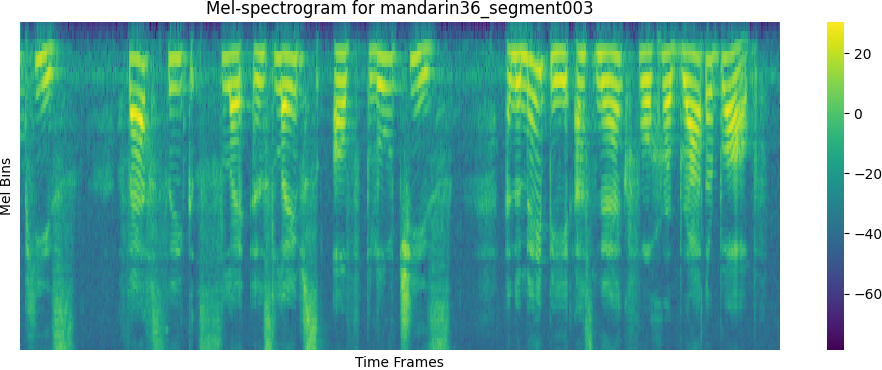

Playing audio for mandarin36_segment003:



--- Sample: spanish18_segment002 ---
Displaying Mel-spectrogram for spanish18_segment002:


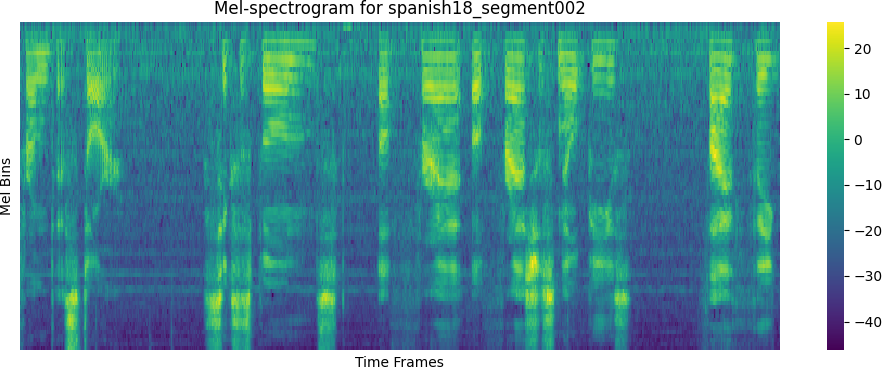

Playing audio for spanish18_segment002:



--- Sample: japanese4_segment005 ---
Displaying Mel-spectrogram for japanese4_segment005:


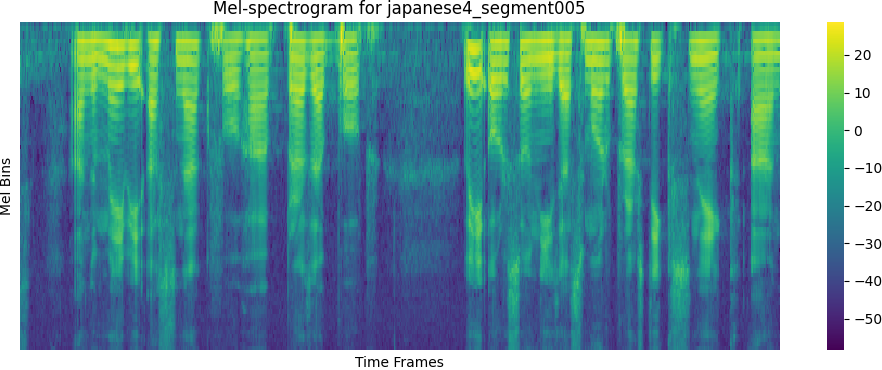

Playing audio for japanese4_segment005:



--- Sample: mandarin50_segment005 ---
Displaying Mel-spectrogram for mandarin50_segment005:


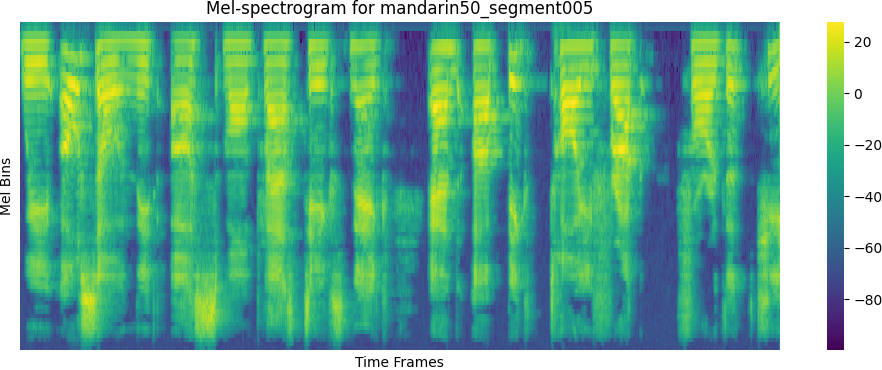

Playing audio for mandarin50_segment005:



--- Sample: nuer1_segment004 ---
Displaying Mel-spectrogram for nuer1_segment004:


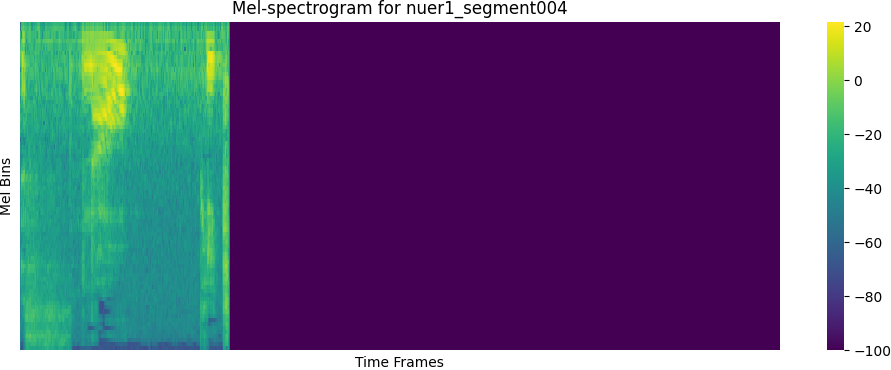

Playing audio for nuer1_segment004:


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import Image, Audio, display
import torchaudio
import torch
import pandas as pd

# 1. Load Segmented DataFrame (if not already loaded)
# This step is already verified to be complete in the previous execution.
# segmented_df is available in memory.

# Re-define mel_spectrogram_image_output as it might have been cleared by runtime restart
mel_spectrogram_image_output = 'mel_spectrogram_images'
if not os.path.exists(mel_spectrogram_image_output):
    os.makedirs(mel_spectrogram_image_output)
    print(f"Created output directory for mel-spectrogram images: {mel_spectrogram_image_output}")
else:
    print(f"Output directory for mel-spectrogram images already exists: {mel_spectrogram_image_output}")


# 2. Define Helper for Mel-spectrogram Image Generation from NPY
def generate_mel_spectrogram_image_from_npy(mel_spectrogram_np, segment_id, output_dir):
    """
    Generates and saves a visualization (heatmap) of a mel-spectrogram NumPy array.

    Args:
        mel_spectrogram_np (np.ndarray): The mel-spectrogram as a NumPy array (e.g., shape [1, N_MELS, T]).
        segment_id (str): A unique identifier for the segment.
        output_dir (str): The directory where the mel-spectrogram image will be saved.

    Returns:
        str: The path to the saved mel-spectrogram image file, or None if processing failed.
    """
    try:
        output_filepath_image = os.path.join(output_dir, f'{segment_id}.png')

        # Ensure the input array has the expected shape (e.g., squeeze if it has a channel dimension)
        if mel_spectrogram_np.ndim > 2 and mel_spectrogram_np.shape[0] == 1:
            mel_spectrogram_np = mel_spectrogram_np.squeeze(axis=0)

        plt.figure(figsize=(10, 4))
        sns.heatmap(mel_spectrogram_np, cmap='viridis', cbar=True, yticklabels=False, xticklabels=False)
        plt.title(f'Mel-spectrogram for {segment_id}')
        plt.xlabel('Time Frames')
        plt.ylabel('Mel Bins')
        plt.tight_layout()
        plt.savefig(output_filepath_image, bbox_inches='tight', pad_inches=0)
        plt.close() # Close the plot to free memory
        return output_filepath_image
    except Exception as e:
        print(f"Error generating mel-spectrogram image for {segment_id}: {e}")
        return None

print("Defined `generate_mel_spectrogram_image_from_npy` helper function.")


# 3. Qualitative Check: Display Sample Mel-spectrogram Images and Audio
print("\nPerforming qualitative check: Displaying 5 sample mel-spectrograms and playing corresponding audio.")
sample_df = segmented_df.sample(n=5, random_state=42) # Use a fixed random_state for reproducibility

for index, row in sample_df.iterrows():
    segment_id = row['segment_id']
    mel_spectrogram_path = row['mel_spectrogram_path']
    segment_audio_path = row['segment_path']

    print(f"\n--- Sample: {segment_id} ---")

    # Load and display mel-spectrogram image
    if mel_spectrogram_path and os.path.exists(mel_spectrogram_path):
        try:
            # Load the .npy mel-spectrogram
            mel_spectrogram_npy = np.load(mel_spectrogram_path)

            # Generate and save the image using the helper function
            image_path = generate_mel_spectrogram_image_from_npy(mel_spectrogram_npy, segment_id, mel_spectrogram_image_output)

            if image_path and os.path.exists(image_path):
                print(f"Displaying Mel-spectrogram for {segment_id}:")
                display(Image(filename=image_path))
            else:
                print(f"Could not generate/find image for {segment_id} at {image_path}")
        except Exception as e:
            print(f"Error loading or processing mel-spectrogram .npy for {segment_id}: {e}")
    else:
        print(f"Mel-spectrogram .npy file not found for {segment_id} at {mel_spectrogram_path}")

    # Load and display audio player
    if segment_audio_path and os.path.exists(segment_audio_path):
        print(f"Playing audio for {segment_id}:")
        display(Audio(segment_audio_path, autoplay=False))
    else:
        print(f"Audio file not found for {segment_id} at {segment_audio_path}")

# Conclusion EDA and Further Processing Suggestions/Reminders

Loaded and Prepared Data for Model Development:
The goal is to set up a robust training, validation, and test pipeline that accounts for class imbalance and prevents data leakage.

Data Overview and Loading Instructions
##1. Data Location
All processed audio segments and their associated metadata are stored on Google Drive in the following locations:

Processed Audio Segments: Individual 7-second WAV files are located in the segmented_audio_output directory.
Segment Metadata: A comprehensive Parquet file named final_segmented_metadata_with_mels.parquet is located in the segmented_parquet_output directory. This file contains all the necessary information about each audio segment.
Mel-spectrogram Features: The pre-computed mel-spectrograms (as NumPy arrays) for each segment are located in the mel_spectrogram_output directory, and their paths are referenced in the metadata DataFrame.


##2. Loading the Main Metadata DataFrame

import pandas as pd
import os
from google.colab import drive

### Mount Google Drive (if not already mounted)
drive.mount('/content/drive')

### Project directory (adjust if different)
os.chdir('/content/drive/MyDrive/SpeechAccentRecognition')

### Define paths
segmented_parquet_output = 'segmented_parquet_output'
output_final_segmented_parquet_file = os.path.join(segmented_parquet_output, 'final_segmented_metadata_with_mels.parquet')

### Load the segmented_df DataFrame
segmented_df = pd.read_parquet(output_final_segmented_parquet_file)
print("segmented_df loaded successfully.")
print(segmented_df.head())
print(f"DataFrame shape: {segmented_df.shape}")

##3. Explanation of Key Columns in segmented_df
original_id: The unique identifier of the original, longer audio file from which this 7-second segment was derived. Crucial for preventing data leakage during splitting.
accent: The accent label of the original speaker, inherited by this segment. This is our target variable.
segment_id: A unique identifier assigned to this specific 7-second audio segment (e.g., original_id_segment001).
segment_path: The full file path to the 7-second WAV audio file on disk (segmented_audio_output/). These files are already 16kHz, mono, trimmed of external silences, and padded/segmented to 7 seconds.
segment_start_time_in_original_audio: The start timestamp (in seconds) of this 7-second segment within its original, untrimmed audio file.
segment_end_time_in_original_audio: The end timestamp (in seconds) of this 7-second segment within its original, untrimmed audio file.
recalculated_leading_silence_segment: The leading silence duration (in seconds) within this 7-second segment itself. This should be near zero or zero for most, confirming cleanliness.
recalculated_trailing_silence_segment: The trailing silence duration (in seconds) within this 7-second segment itself. Should also be near zero or zero.
recalculated_total_silence_segment: The total silence duration within this 7-second segment.
recalculated_internal_silence_segment: The internal silence duration (pauses) within this 7-second segment.
mel_spectrogram_path: The full file path to the pre-computed mel-spectrogram (as a NumPy array) on disk (mel_spectrogram_output/). These .npy files are the direct model inputs.

##4. Addressing Class Imbalance (Training Set)
Our dataset has a significant class imbalance (as seen in earlier EDA). To ensure our model can effectively learn to detect lesser-represented accents, apply one or more of the following strategies only to the training set:

Oversampling: Increase the number of samples in minority classes.
Recommendation: Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) if mel-spectrograms can be appropriately handled. Otherwise, simpler random oversampling (duplicating samples) can be a baseline.
Undersampling: Reduce the number of samples in majority classes.
Recommendation: Use RandomUnderSampler or more sophisticated methods like NearMiss or EditedNearestNeighbours to remove samples from the majority class without losing too much information.
Combination of Over- and Undersampling: Often the most effective strategy, balancing the benefits of both.
Class Weighting: Assign higher weights to minority classes in the model's loss function. This is often the simplest to implement as it directly adjusts the loss calculation during training. Many PyTorch loss functions (e.g., CrossEntropyLoss) accept a weight parameter.
Note: The choice of optimal over/undersampling ratios or class weights is a hyperparameter and should be tuned, typically during model development and validation.

##5. Preventing Data Leakage in Train/Validation/Test Splits
To ensure an unbiased evaluation of  model and prevent data leakage from the overlapping segments, the splitting must be done carefully:

Primary Split Key: original_id: The most critical step is to perform the initial train/validation/test split at the level of original_id (the unique identifier for the original, longer audio files). This means all 7-second segments derived from a single original_id must reside entirely within one split (train, validation, or test).
Stratification by Accent: When splitting the original_ids, ensure the split is stratified by accent label. This will maintain the overall class distribution (even if imbalanced) in train, validation, and test sets, providing a realistic evaluation.
Recommended Ratio: A common robust split is 70% Training, 15% Validation, and 15% Test.
Process:
Get a list of all unique original_ids and their corresponding accent labels.
Use sklearn.model_selection.train_test_split with stratify on these original_ids to create train_original_ids, val_original_ids, and test_original_ids.
Handle single-instance accent classes: Any original_id belonging to an accent with only one instance cannot be stratified across all three sets. These original_ids should be moved to the training set to ensure all data is used and stratified splitting can proceed for the majority of the data.
Filter segmented_df using these train_original_ids, val_original_ids, and test_original_ids to create train_df, val_df, and test_df.

##6. Saving Split DataFrames
Save the resulting train_df, val_df, and test_df to separate Parquet files (e.g., train_metadata.parquet, val_metadata.parquet, test_metadata.parquet) in a new directory named model_data_splits. This will allow efficient reloading of prepared splits for model training and evaluation.
